In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_path = 'ccm_rul_dataset2.csv'

data = pd.read_csv(file_path)

data.head()

date  workpiece_weight, tonn steel_type doc_requirement  cast_in_row  \
0  2020-01-05                   144.9     Arm240  DOC 34028-2016            4   
1  2020-01-05                   165.9      St3sp        Contract           10   
2  2020-01-05                   168.0     Arm240  DOC 34028-2016            5   
3  2020-01-05                   170.1      St3sp        Contract            7   
4  2020-01-05                   163.8      St3sp        Contract           12   

  workpiece_slice_geometry alloy_type  steel_weight_theoretical, tonn  \
0                  150x150       open                           145.3   
1                  150x150       open                           166.3   
2                  150x150       open                           168.4   
3                  150x150       open                           170.5   
4                  150x150       open                           164.2   

   slag_weight_close_grab1, tonn  metal_residue_grab1, tonn  ...   Al, %  \
0                            1.8                        0.4  ...  0.0022   
1                            1.8                        0.4  ...  0.0028   
2                            1.8                        0.4  ...  0.0031   
3                            1.8                        0.4  ...  0.0034   
4                            1.8                        0.4  ...  0.0032   

    Ca, %    N, %  Pb, %  Mg, %  Zn, %    sleeve  num_crystallizer  \
0  0.0008  0.0085    0.0    0.0    0.0  30012261                22   
1  0.0004  0.0049    0.0    0.0    0.0  30013346                 2   
2  0.0011  0.0068    0.0    0.0    0.0  30012261                22   
3  0.0005  0.0051    0.0    0.0    0.0  30012261                22   
4  0.0004  0.0038    0.0    0.0    0.0  30012261                22   

   num_stream     RUL  
0           4   384.0  
1           1  1037.0  
2           4   355.0  
3           4   300.0  
4           4   164.0  

[5 rows x 57 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17503 entries, 0 to 17502
Data columns (total 57 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   date                                                         17503 non-null  object 
 1   workpiece_weight, tonn                                       17503 non-null  float64
 2   steel_type                                                   17503 non-null  object 
 3   doc_requirement                                              17503 non-null  object 
 4   cast_in_row                                                  17503 non-null  int64  
 5   workpiece_slice_geometry                                     17503 non-null  object 
 6   alloy_type                                                   17503 non-null  object 
 7   steel_weight_theoretical, tonn                               17503 non-null 

Data Cleaning

1. Brakujące wartości
2. Wartości odstające

In [5]:
data.isnull().mean() * 100

date                                                            0.000000
workpiece_weight, tonn                                          0.000000
steel_type                                                      0.000000
doc_requirement                                                 0.000000
cast_in_row                                                     0.000000
workpiece_slice_geometry                                        0.000000
alloy_type                                                      0.000000
steel_weight_theoretical, tonn                                  0.000000
slag_weight_close_grab1, tonn                                   0.000000
metal_residue_grab1, tonn                                       0.000000
steel_weight, tonn                                              0.000000
residuals_grab2, tonn                                          97.069074
technical_trim, tonn                                           99.565789
grab1_num                                          

1. Brakujące wartości
Na podstawie zawartej informacji o % udziale pustych wartości w kolumnach możemy podjąć decyzję o usunięciu następujących kolumn:
    a) residuals_grab2, tonn
    b) technical_trim, tonn
    c) Sn, %
    d) Ce, %
Ponaddto usunąć możemy dane zawierające datę, ponieważ zakładamy że zachowana została zasada i.i.d. (Independent and identically distributed), co oznacza, że nasze dany były zbierane w niezmieniających się warunkach i kolejnośc ich występowania nie ma dla nas znaczenia.
    a) date
    b) time_temperature_measurement1
    c) time_temperature_measurement2
Na koniec usuwamy wiersze, gdzie wartości z kolumny RUL są puste (nie możemy uzupełnić kolumny z wartościami objaśnianymi) oraz wiersze, gdzie brakujące wartości występują w kolumnach "kind" oraz "quantity", ponieważ są to istotne kolumny dla naszej analizy, opisują ilość oraz rodzaj stali.

In [6]:
data = data.drop(["residuals_grab2, tonn", "technical_trim, tonn", "Sn, %", "Ce, %", "date", "time_temperature_measurement1", "time_temperature_measurement2"], axis="columns")

In [7]:
data = data.dropna(subset=['RUL'])

data.isnull().mean() * 100

workpiece_weight, tonn                                          0.000000
steel_type                                                      0.000000
doc_requirement                                                 0.000000
cast_in_row                                                     0.000000
workpiece_slice_geometry                                        0.000000
alloy_type                                                      0.000000
steel_weight_theoretical, tonn                                  0.000000
slag_weight_close_grab1, tonn                                   0.000000
metal_residue_grab1, tonn                                       0.000000
steel_weight, tonn                                              0.000000
grab1_num                                                       1.562590
steel_temperature_grab1, Celsius deg.                           0.017362
grab2_num                                                       0.092598
resistance, tonn                                   

Sprawdzenie, czy brakuje tych samych wierszy w kolumnie "kind" oraz "quantity".

In [8]:
both_na = data['kind'].isna() & data['quantity, tonn'].isna()

matching_na_count = both_na.sum()

print(f"Liczba wierszy, gdzie puste wartości w 'kind' pokrywają się z pustymi wartościami w 'quantity': {matching_na_count}")

Liczba wierszy, gdzie puste wartości w 'kind' pokrywają się z pustymi wartościami w 'quantity': 2230


Teraz mamy pewność, że usuniemy jedynie 12,9% rekordów, a nie np ~26%.

In [9]:
data = data.dropna(subset=['kind', 'quantity, tonn'])

data.isnull().mean() * 100

workpiece_weight, tonn                                         0.000000
steel_type                                                     0.000000
doc_requirement                                                0.000000
cast_in_row                                                    0.000000
workpiece_slice_geometry                                       0.000000
alloy_type                                                     0.000000
steel_weight_theoretical, tonn                                 0.000000
slag_weight_close_grab1, tonn                                  0.000000
metal_residue_grab1, tonn                                      0.000000
steel_weight, tonn                                             0.000000
grab1_num                                                      1.747624
steel_temperature_grab1, Celsius deg.                          0.019935
grab2_num                                                      0.106319
resistance, tonn                                               0

Teraz pozostałe brakujące wartości uzupełnimy medianą.

In [10]:
columns_with_nan = data.columns[data.isnull().any()]

for column in columns_with_nan:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

data.isnull().mean() * 100

workpiece_weight, tonn                                         0.0
steel_type                                                     0.0
doc_requirement                                                0.0
cast_in_row                                                    0.0
workpiece_slice_geometry                                       0.0
alloy_type                                                     0.0
steel_weight_theoretical, tonn                                 0.0
slag_weight_close_grab1, tonn                                  0.0
metal_residue_grab1, tonn                                      0.0
steel_weight, tonn                                             0.0
grab1_num                                                      0.0
steel_temperature_grab1, Celsius deg.                          0.0
grab2_num                                                      0.0
resistance, tonn                                               0.0
swing_frequency, amount/minute                                

2. Wartości odstające
   

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


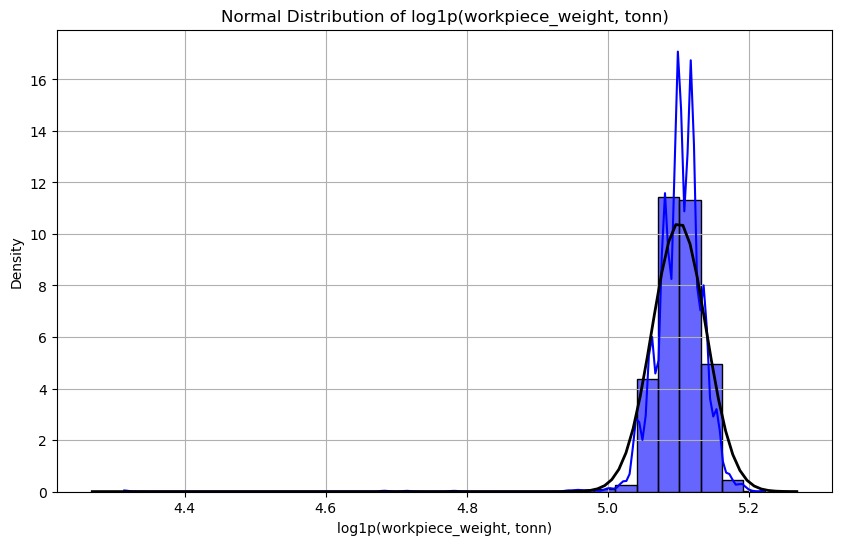

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


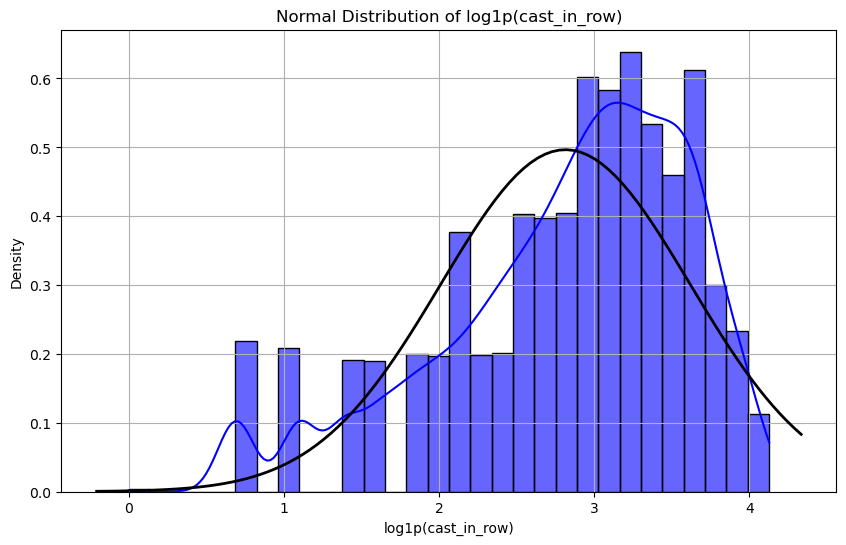

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


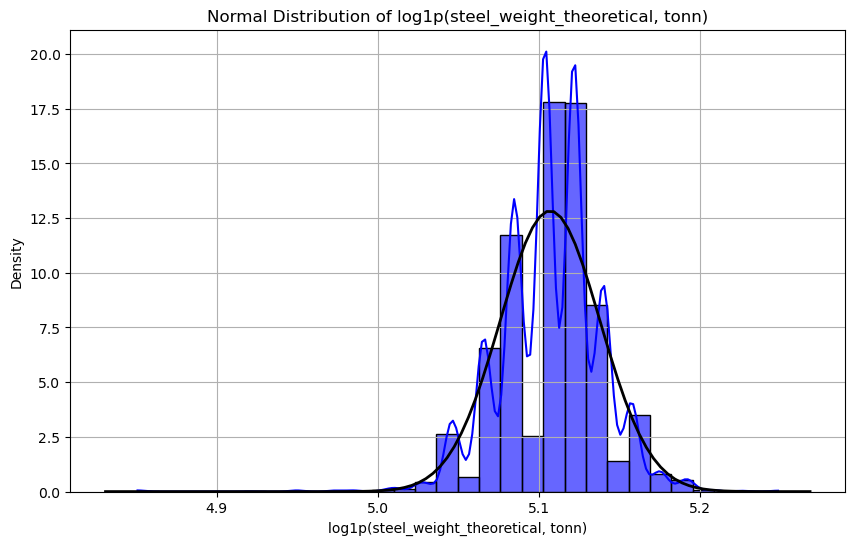

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


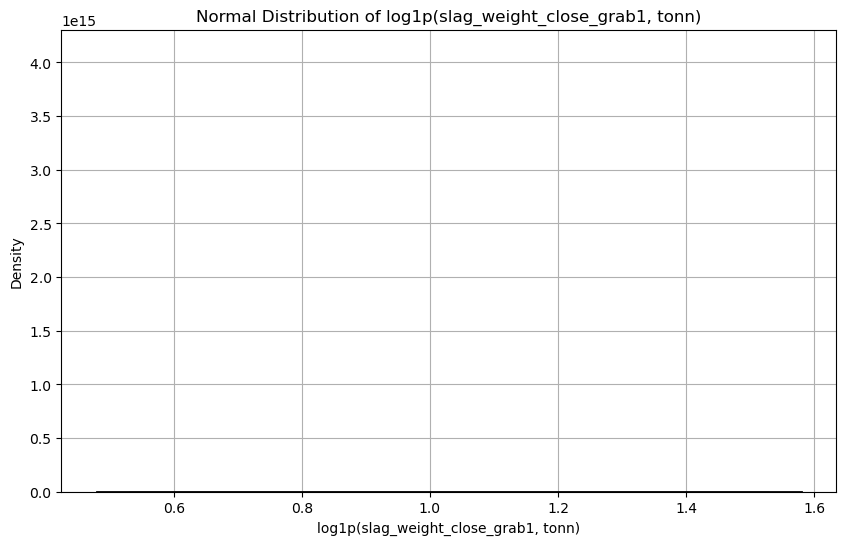

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


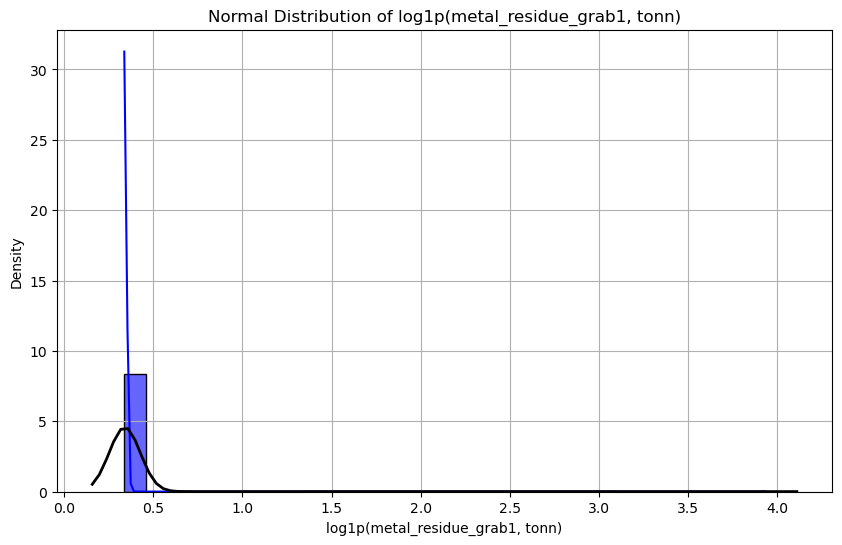

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


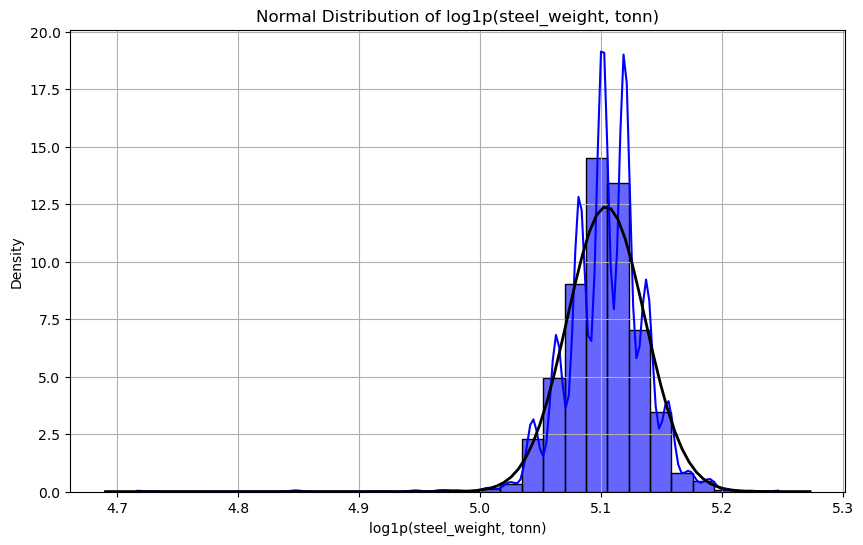

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


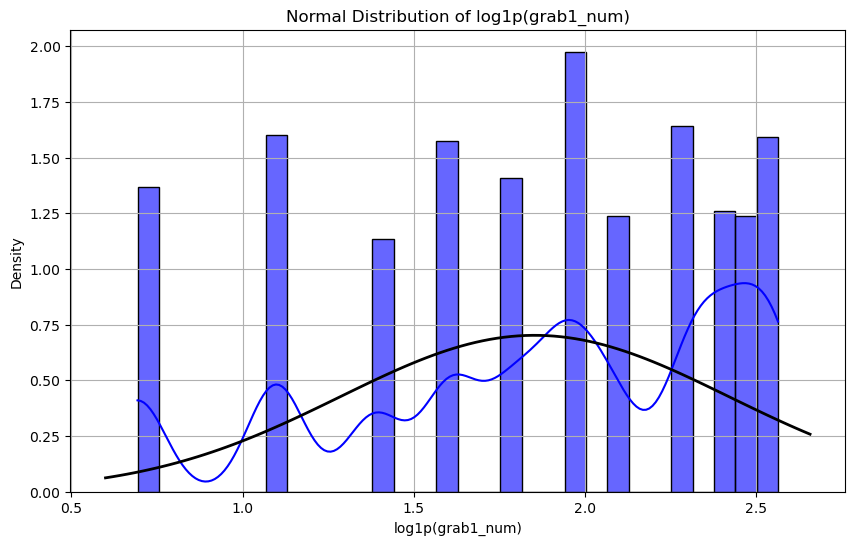

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


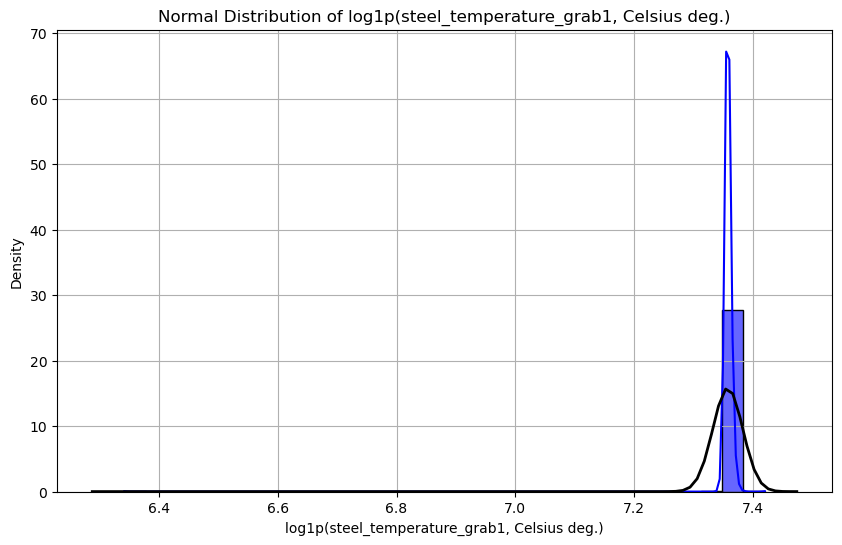

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


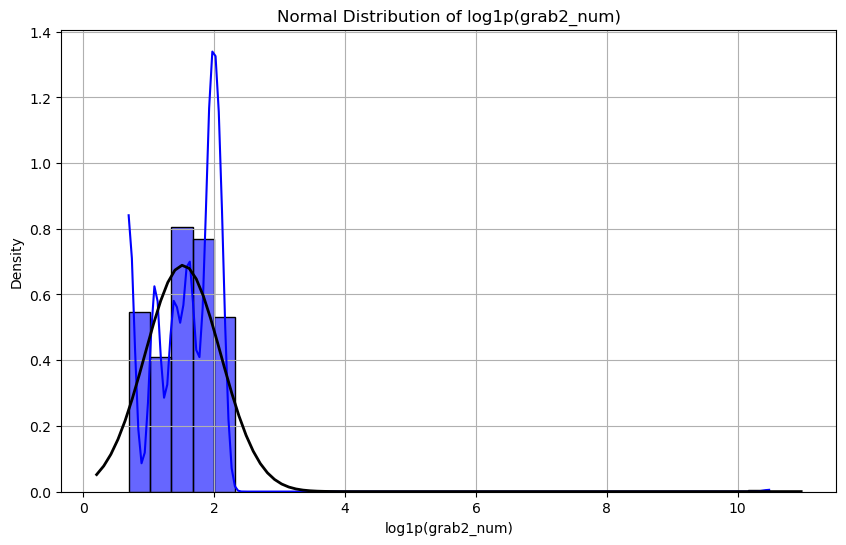

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


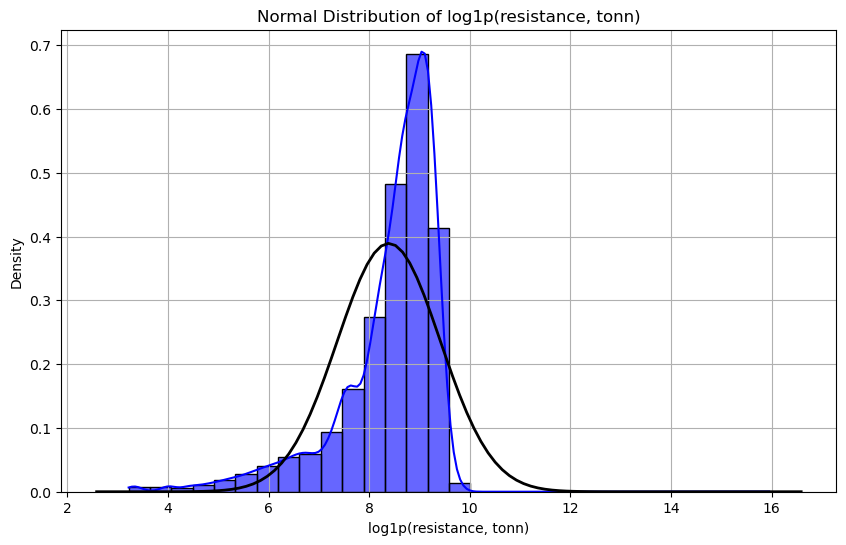

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


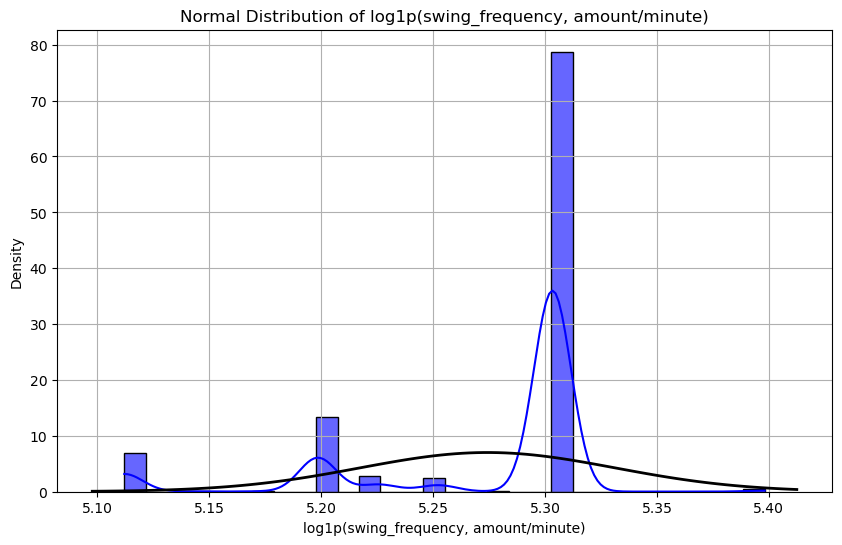

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


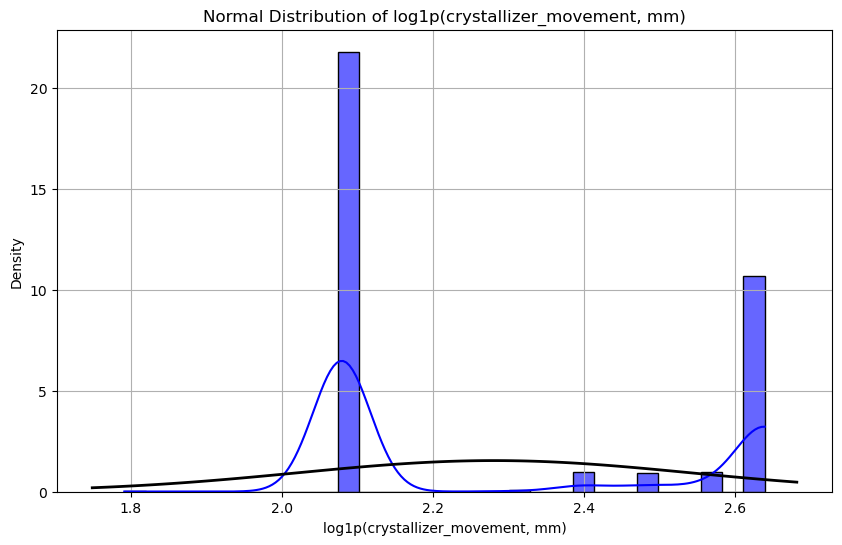

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


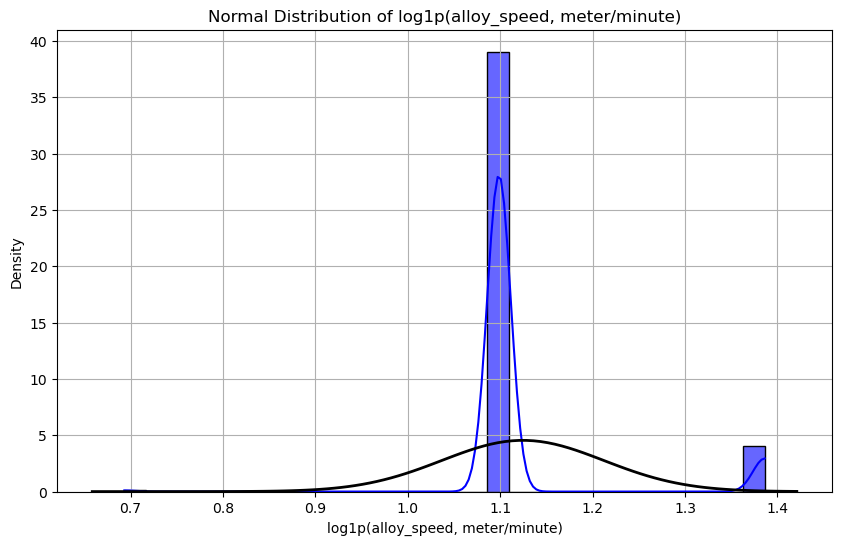

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


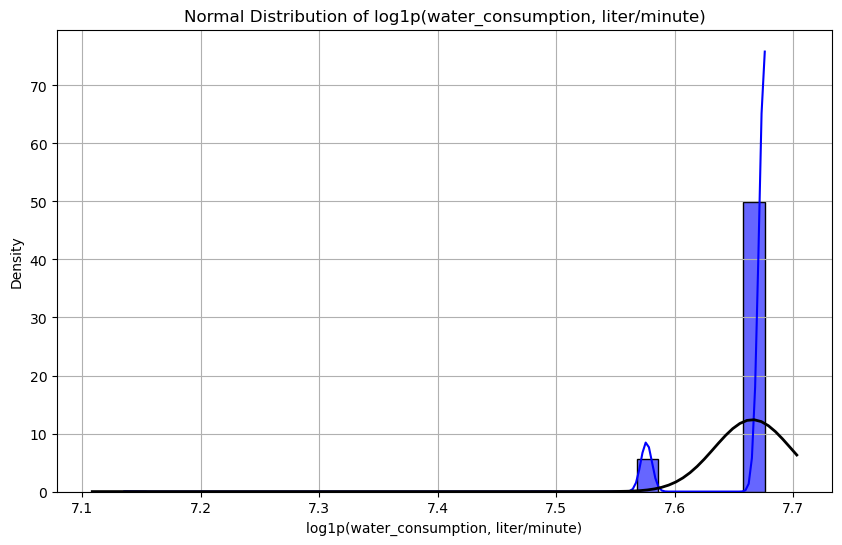

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


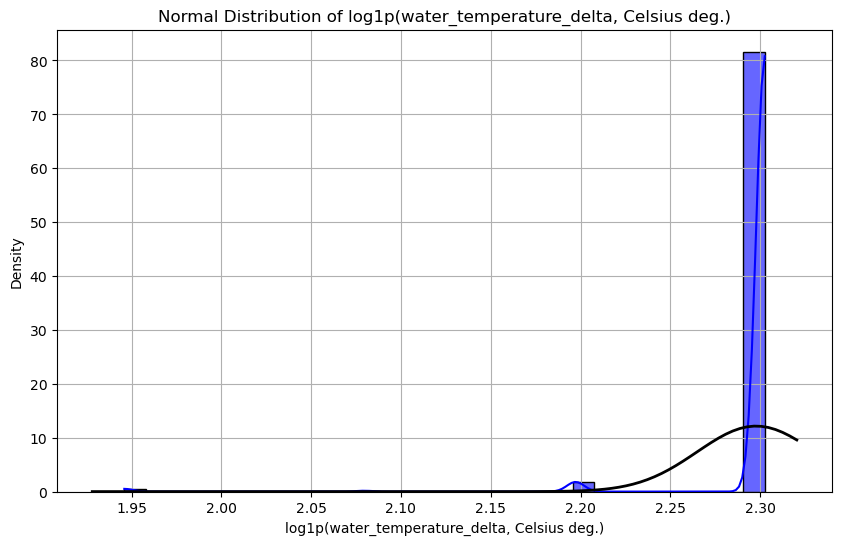

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


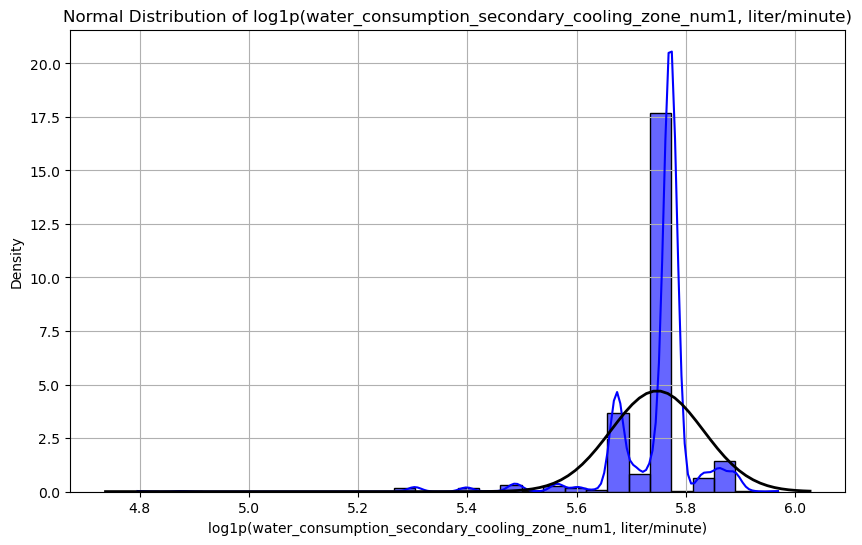

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


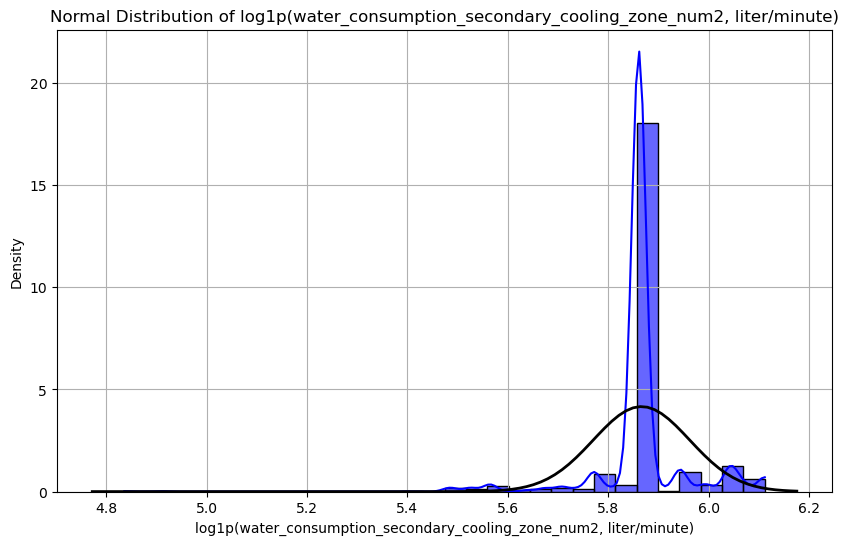

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


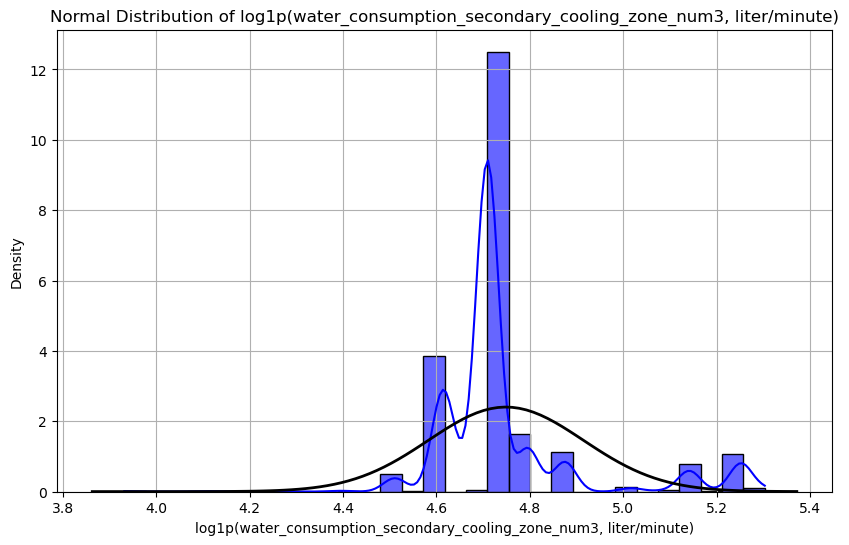

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


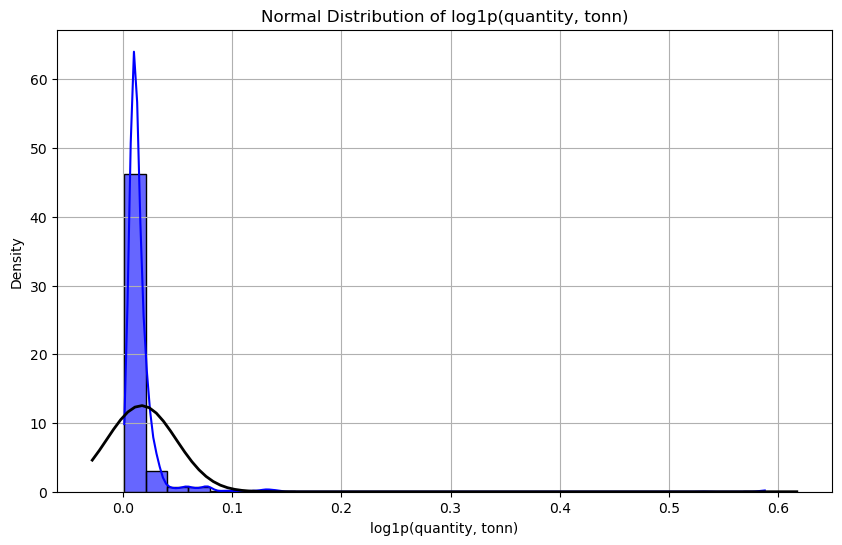

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


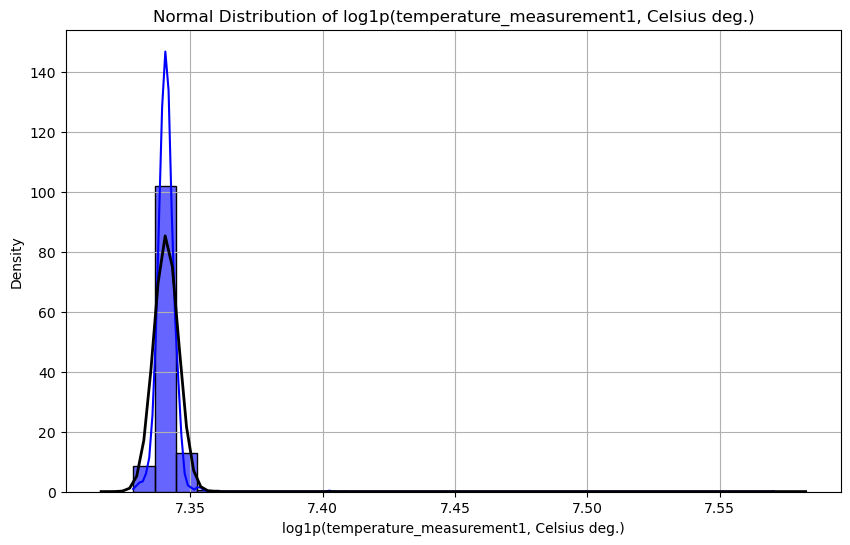

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


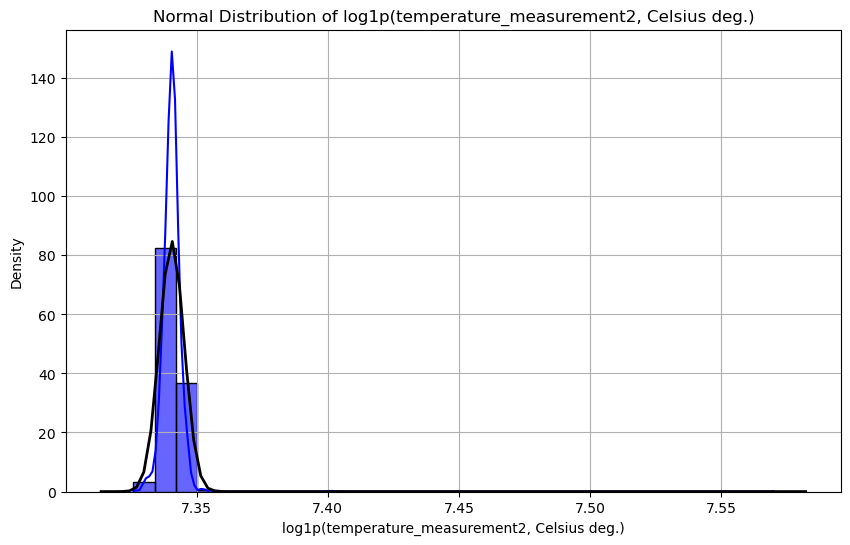

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


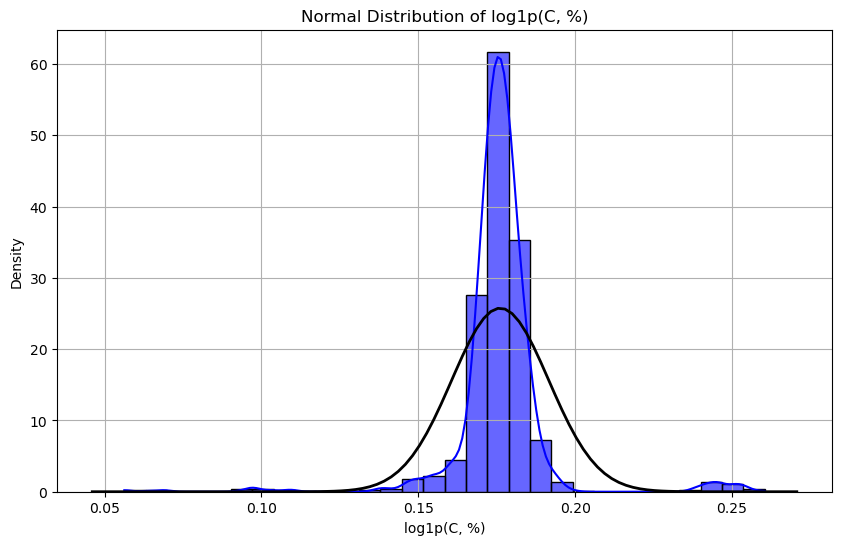

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


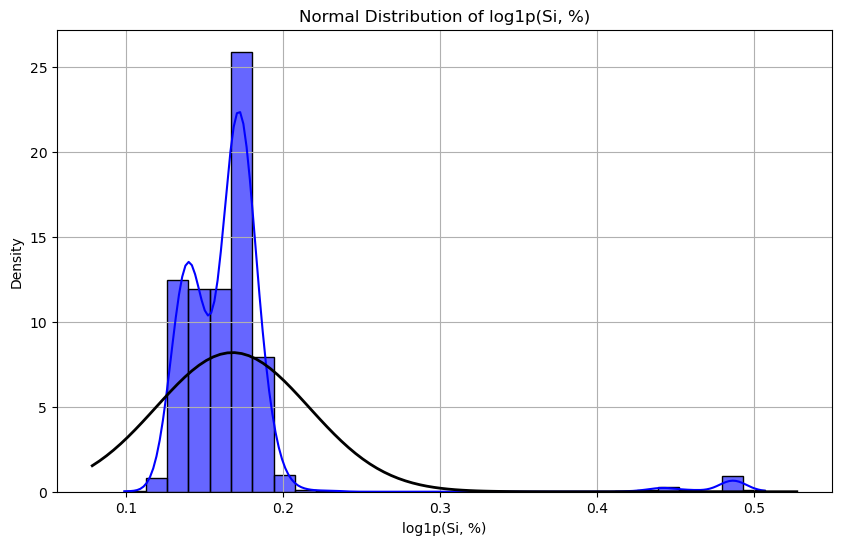

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


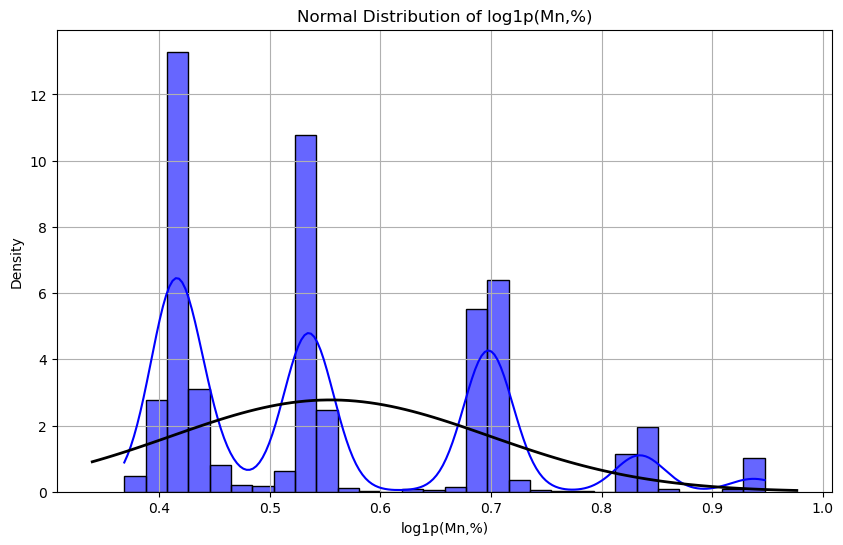

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


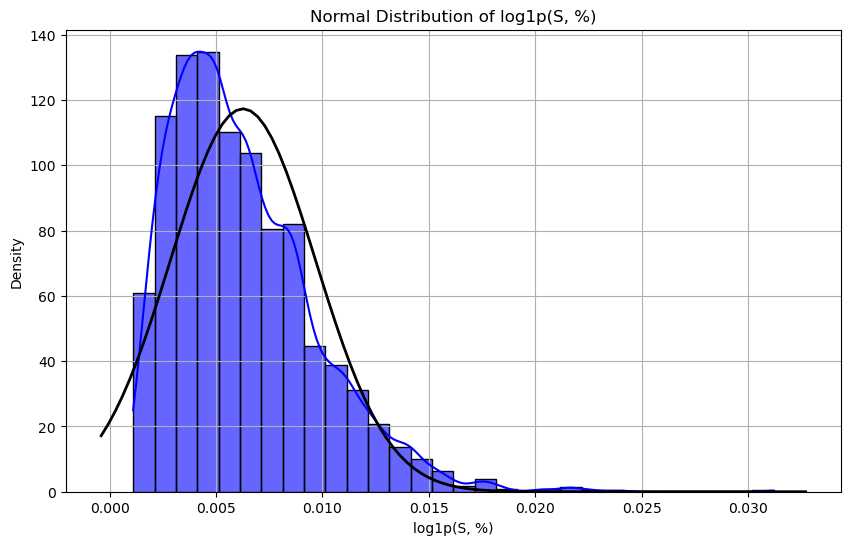

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


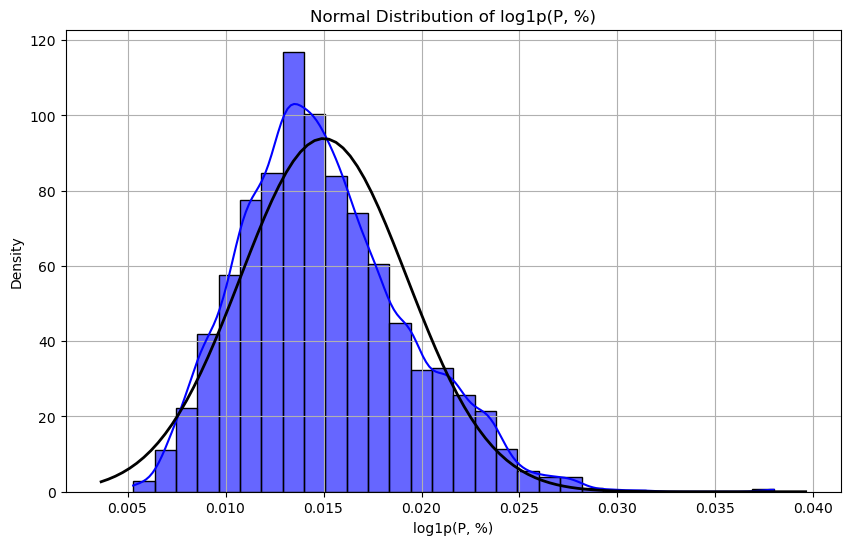

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


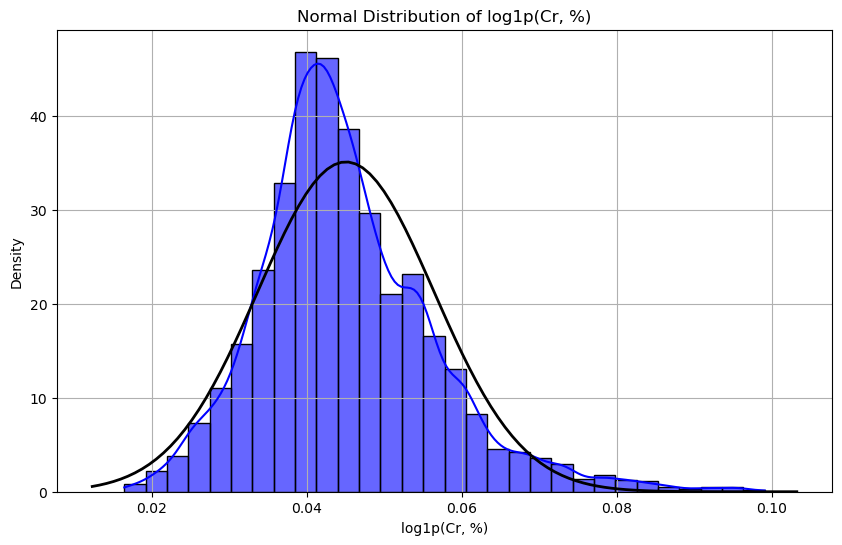

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


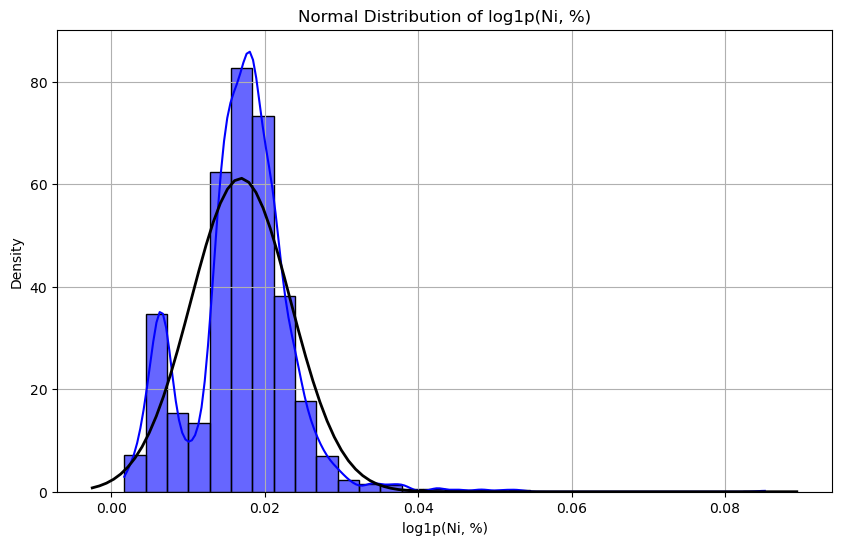

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


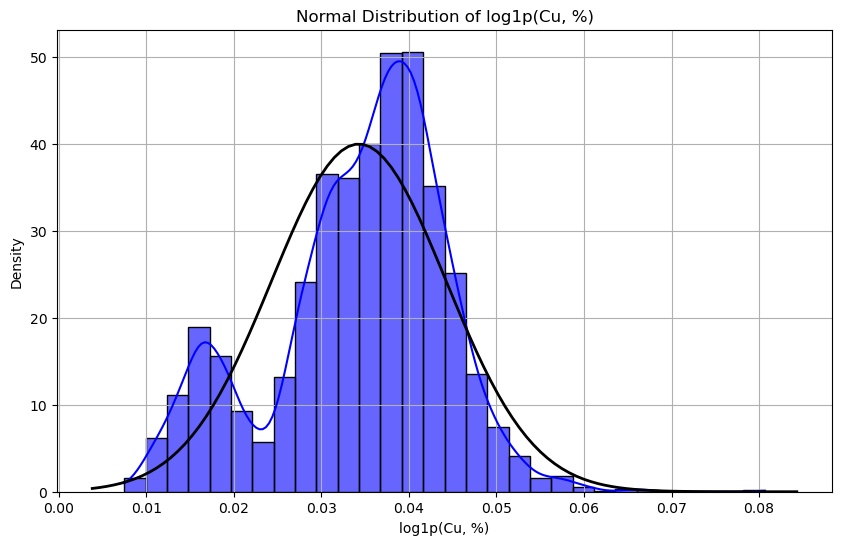

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


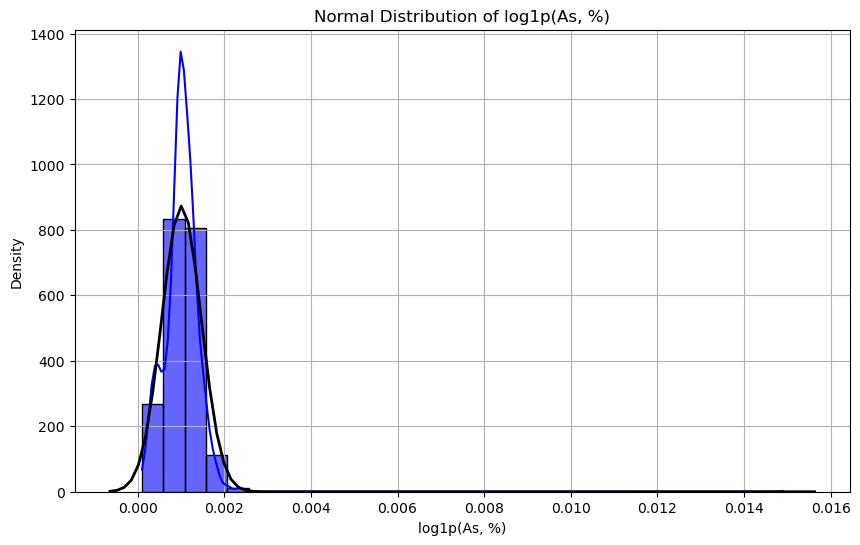

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


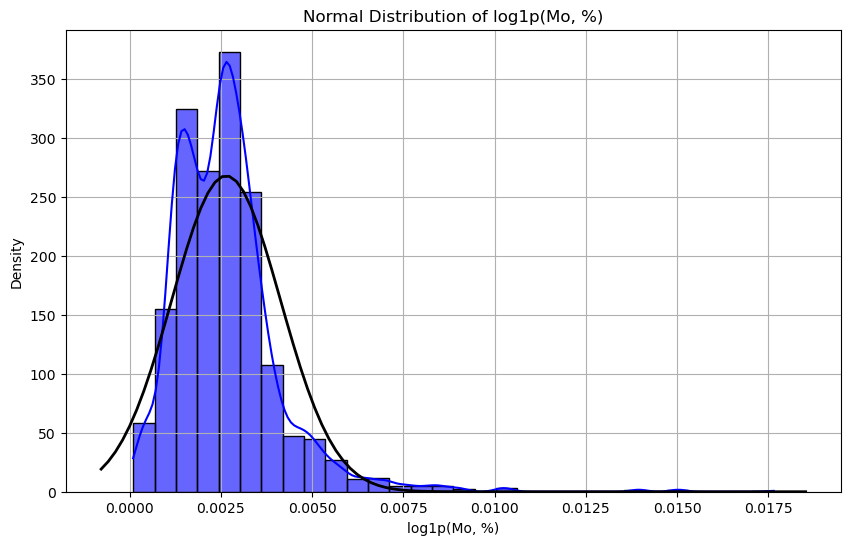

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


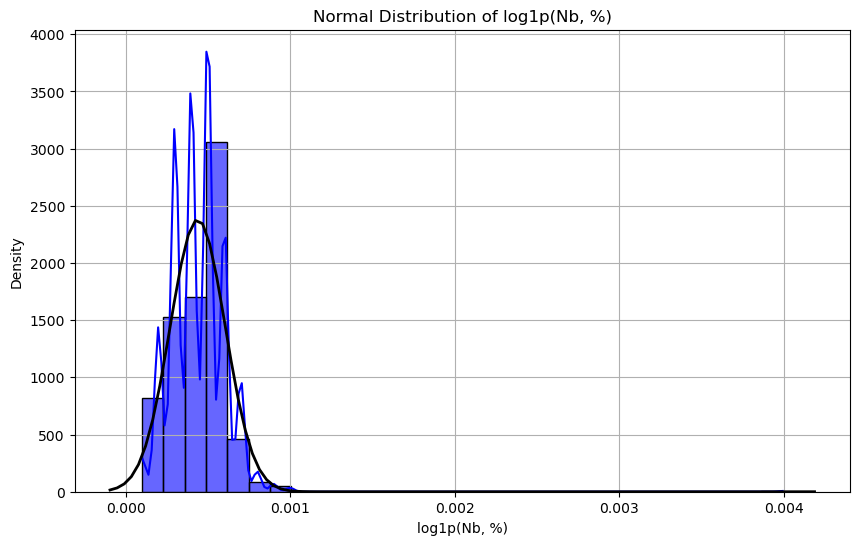

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


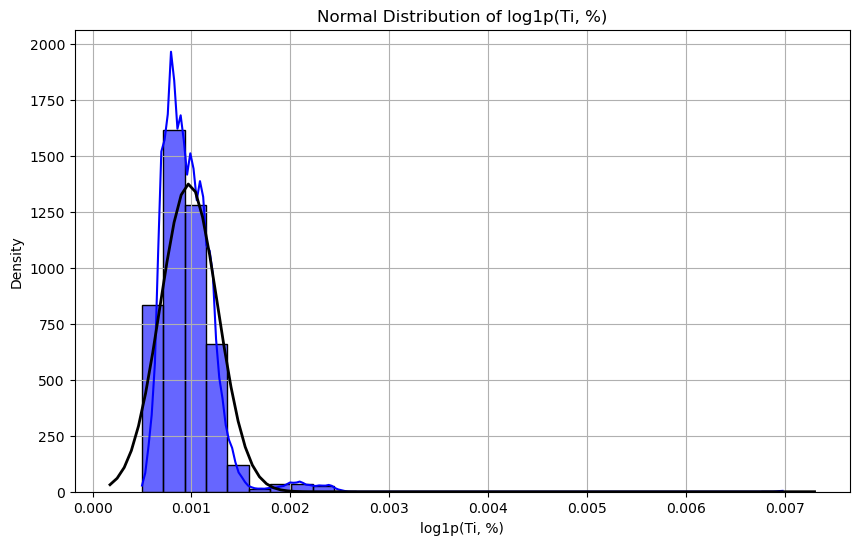

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


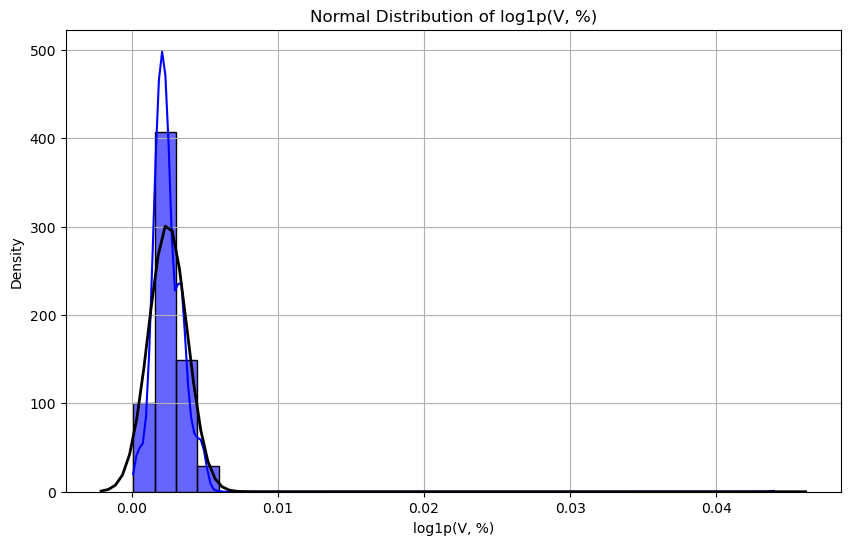

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


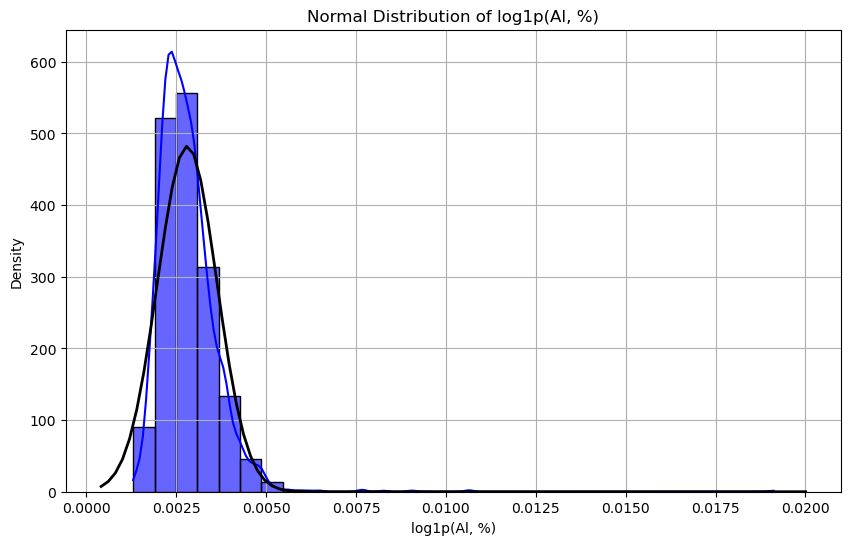

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


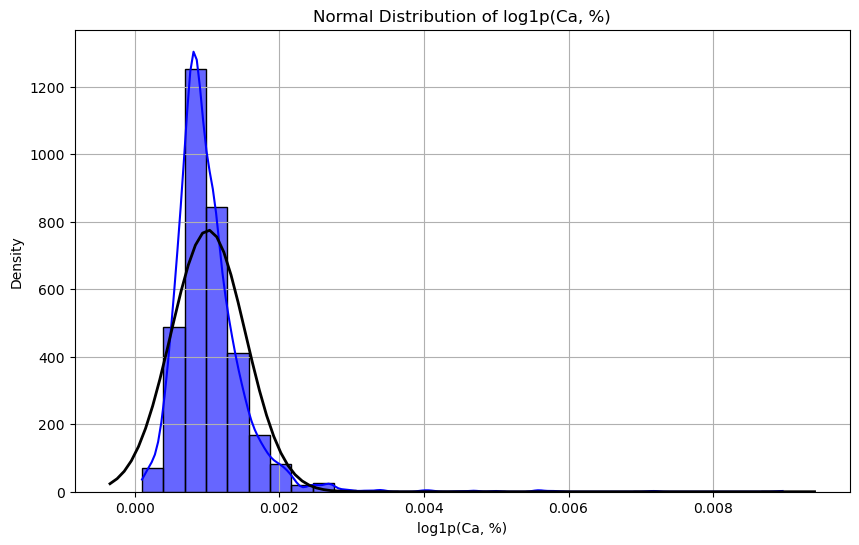

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


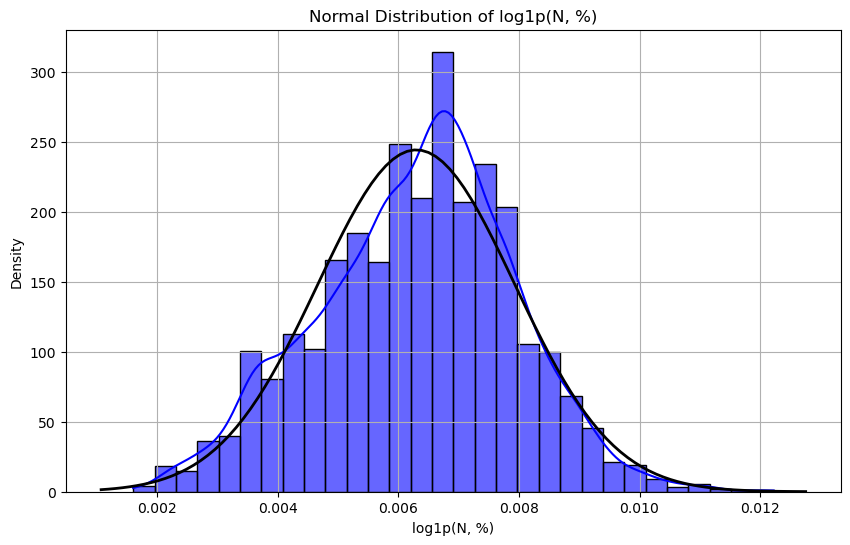

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


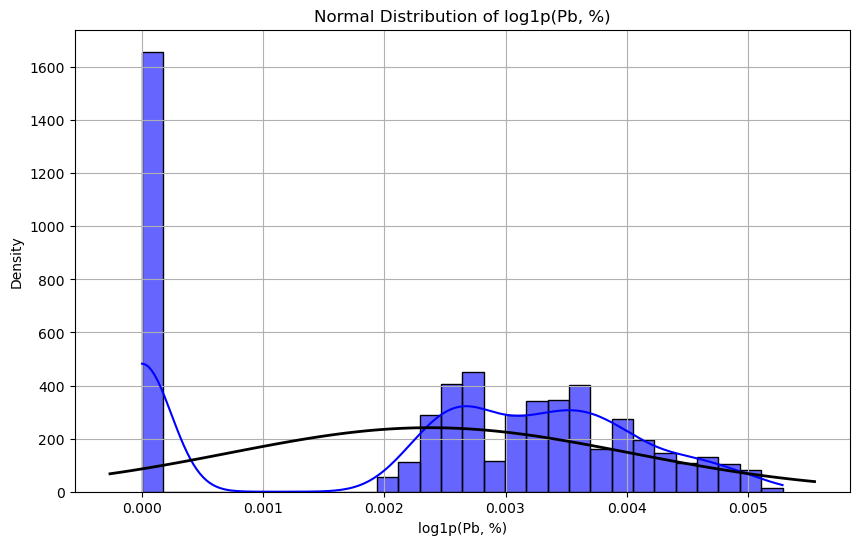

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


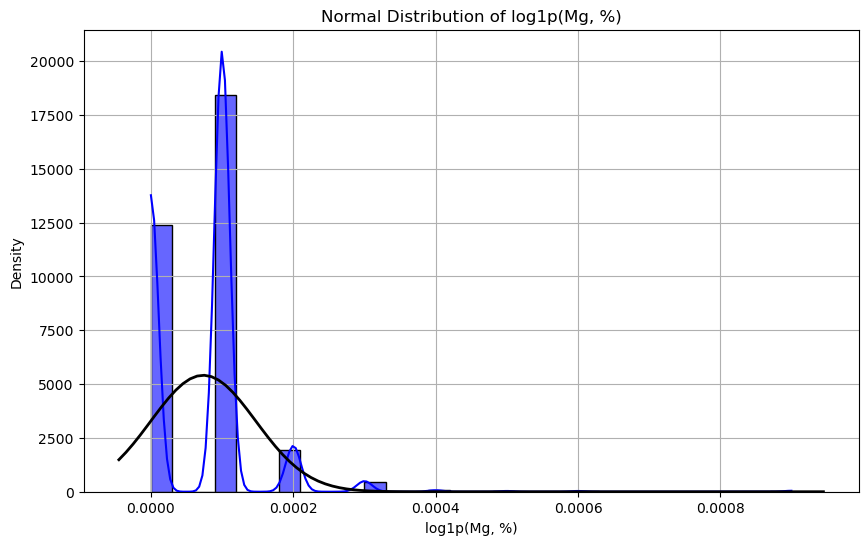

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


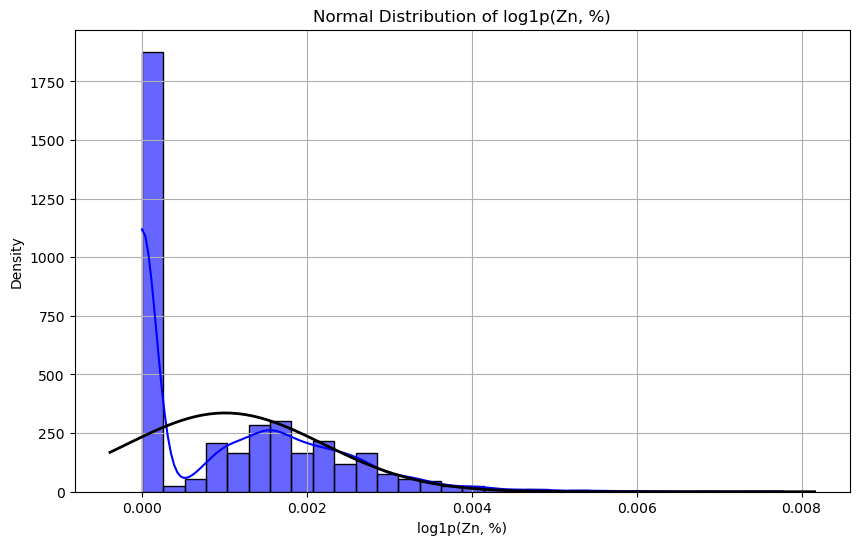

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


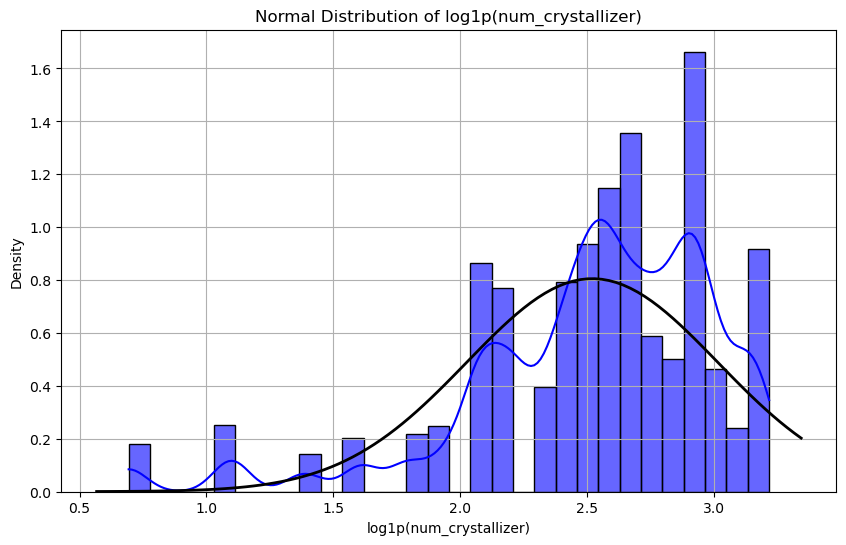

C:\Users\marek_000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


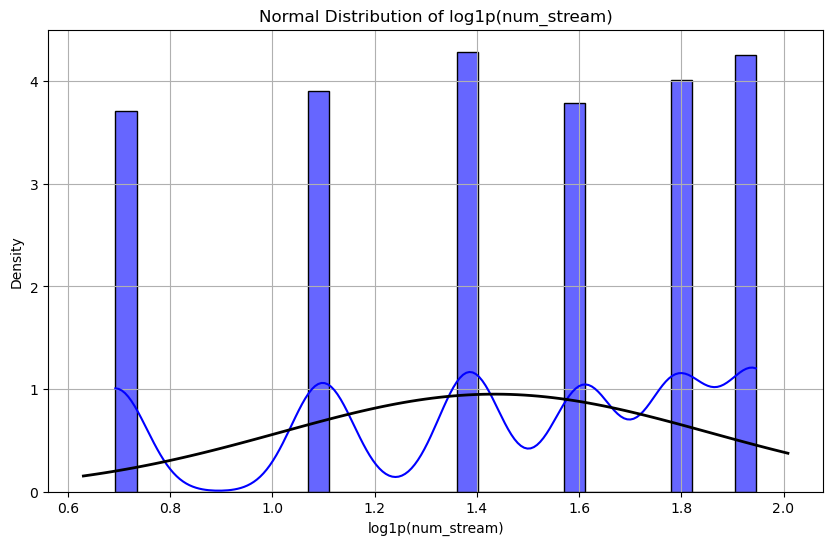

In [11]:
from scipy import stats

for column in data.columns:
    if column != 'RUL' and data[column].dtype in ['float64', 'int64']:
        # Apply log1p transformation
        transformed_data = np.log1p(data[column])

        plt.figure(figsize=(10, 6))
        
        # Plotting the distribution of the transformed data
        sns.histplot(transformed_data, bins=30, kde=True, color='blue', stat='density', alpha=0.6)
        
        # Plotting the normal distribution for comparison
        mu, std = stats.norm.fit(transformed_data)  # Fit a normal distribution
        xmin, xmax = plt.xlim()  # Get the x limits
        x = np.linspace(xmin, xmax, 100)  # Generate x values
        p = stats.norm.pdf(x, mu, std)  # Calculate the normal probability density function
        plt.plot(x, p, 'k', linewidth=2)  # Plot the PDF
        
        plt.title(f"Normal Distribution of log1p({column})")
        plt.xlabel(f"log1p({column})")
        plt.ylabel("Density")
        plt.grid(True)
        plt.show()

Po zbadaniu wykresów funkcji można przystąpić do usunięcia wartości poza 1,5 krotnością odstępu miedzykwartylowego.

In [12]:
def remove_outliers_iqr(data, multiplier=1.5):

    data_clean = data.copy()
    
    for column in data_clean.select_dtypes(include=['number']).columns:
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        data_clean = data_clean[(data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)]
    
    return data_clean

data_clean = remove_outliers_iqr(data)

One-hot-encoding - konwersja zmiennych typu object na pojedyncze wartości.

In [13]:
object_columns = data_clean.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data_clean, columns=object_columns)

data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1893 entries, 111 to 17501
Columns: 424 entries, workpiece_weight, tonn to sleeve_83898
dtypes: bool(381), float64(33), int64(10)
memory usage: 1.3 MB


Badanie korelacji

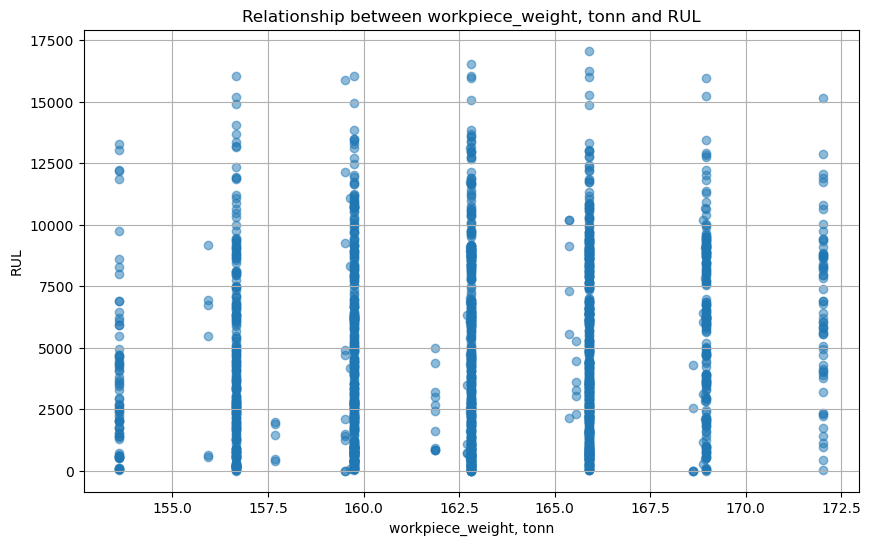

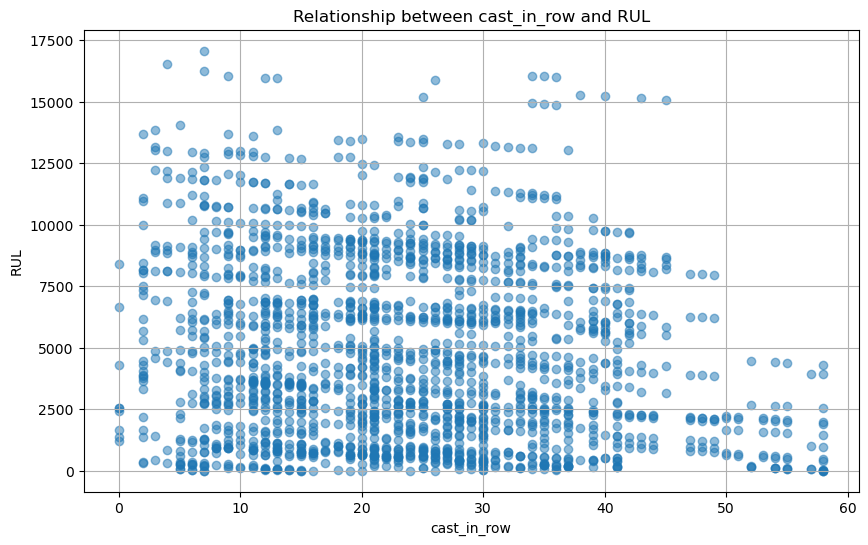

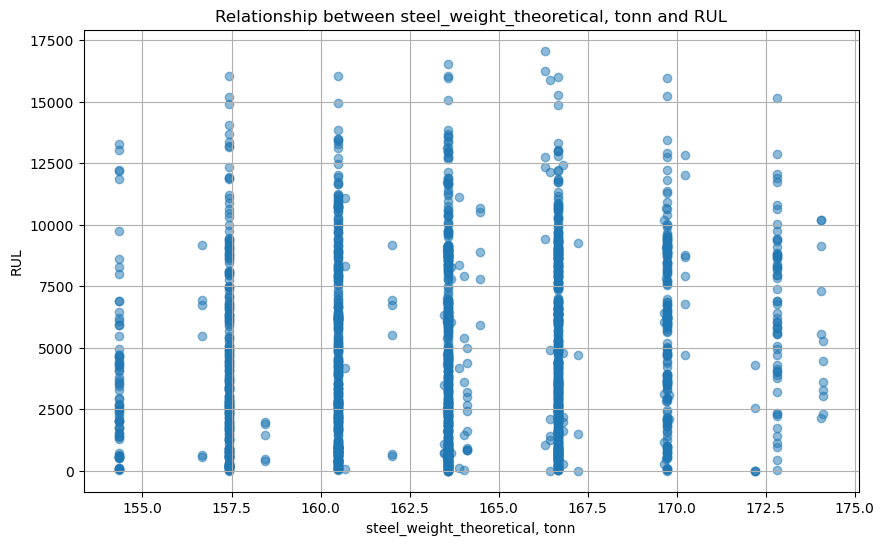

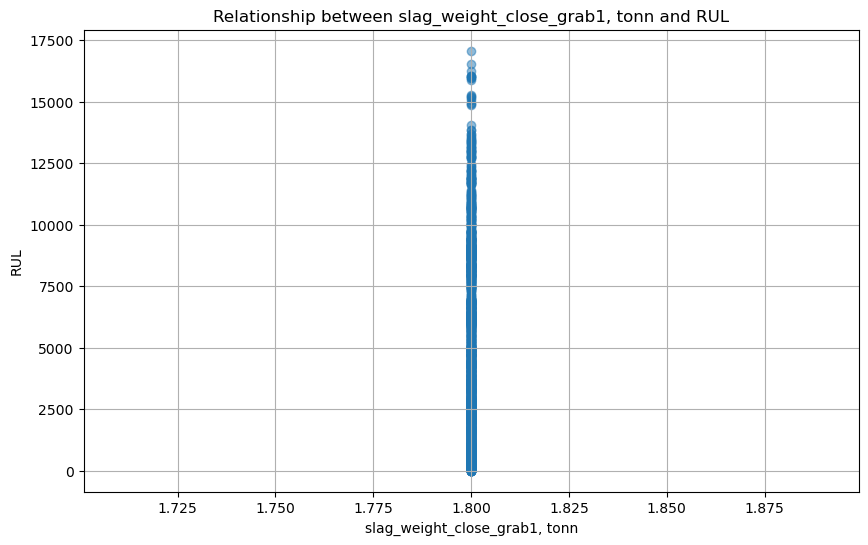

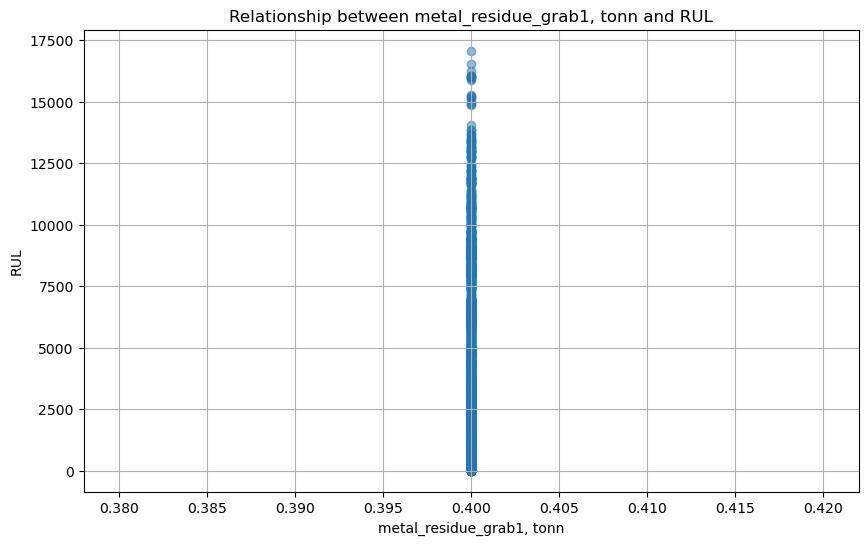

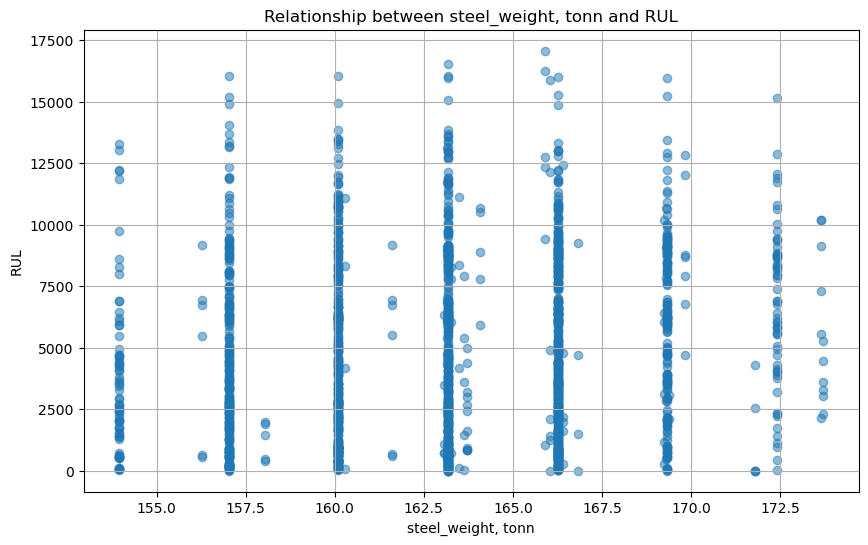

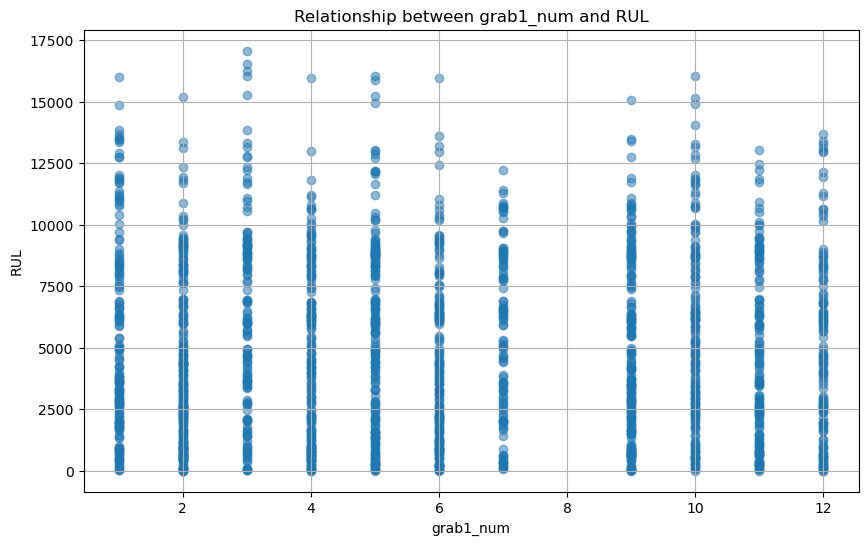

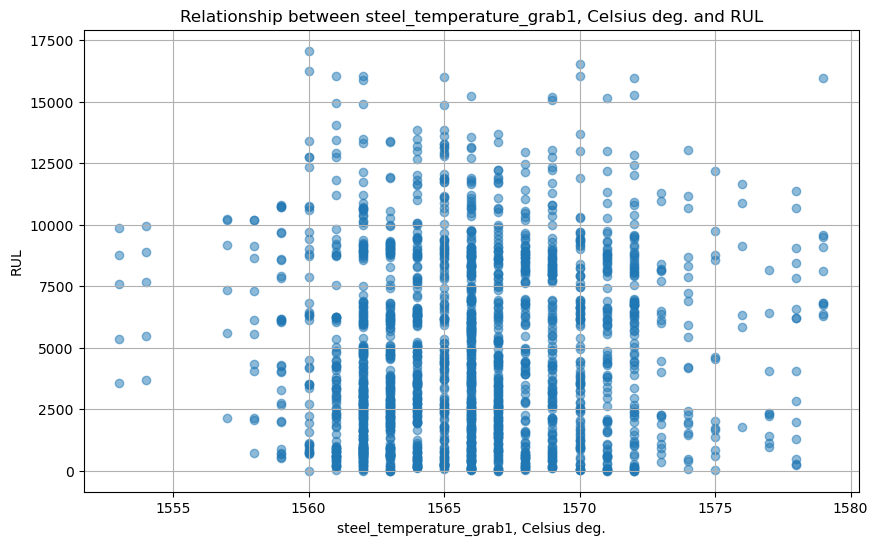

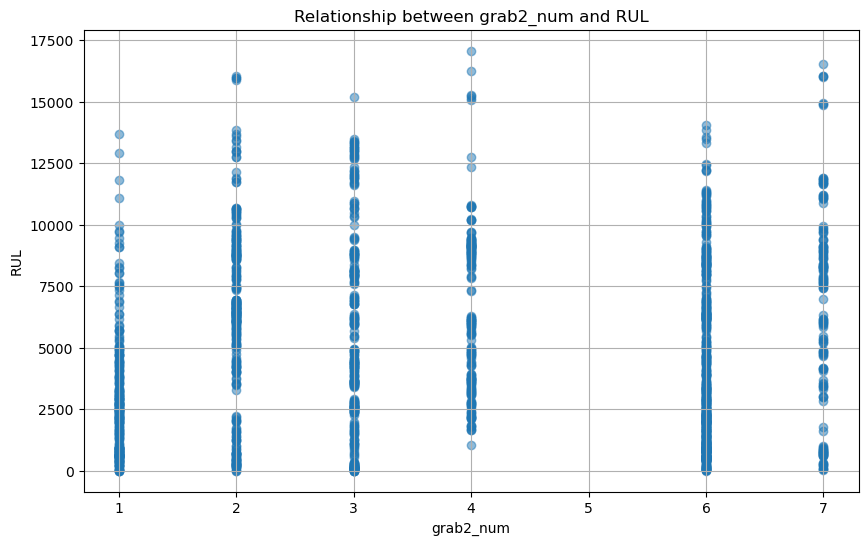

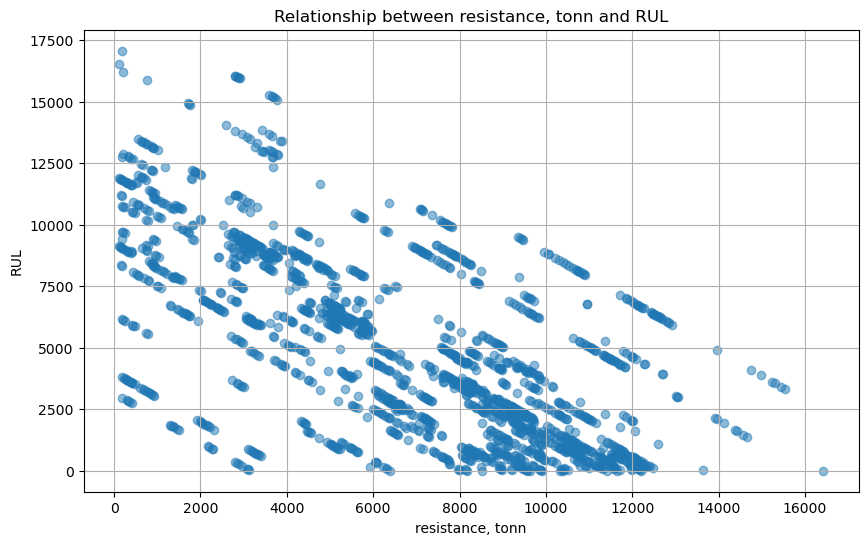

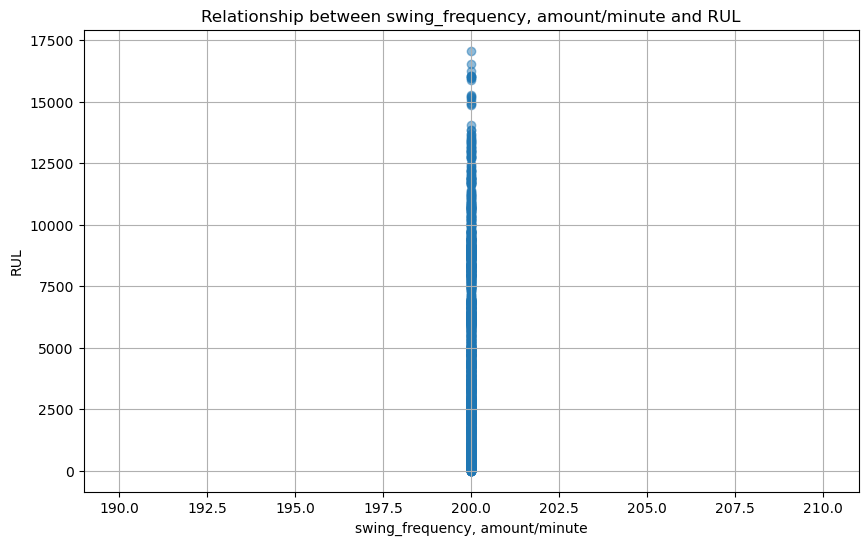

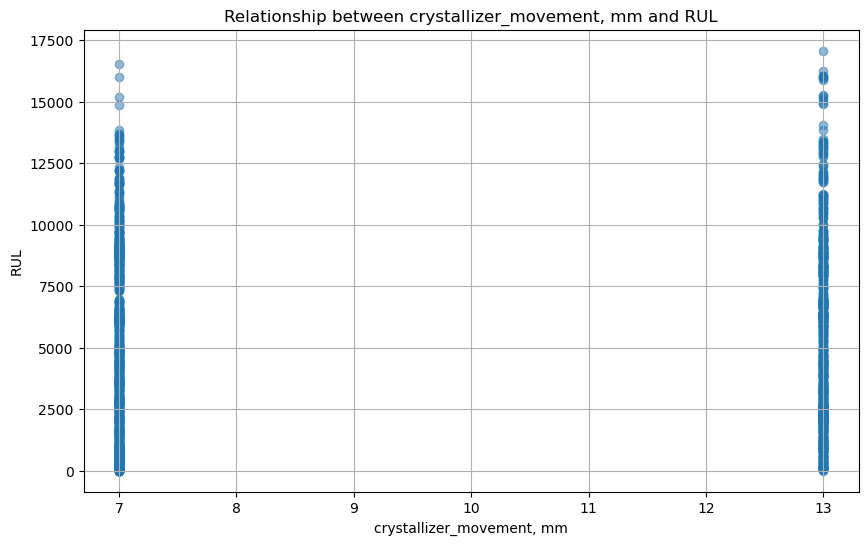

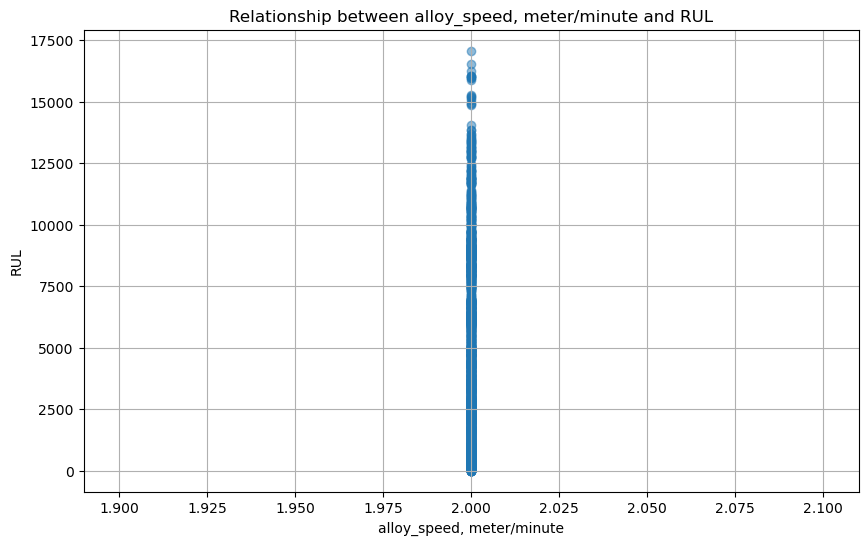

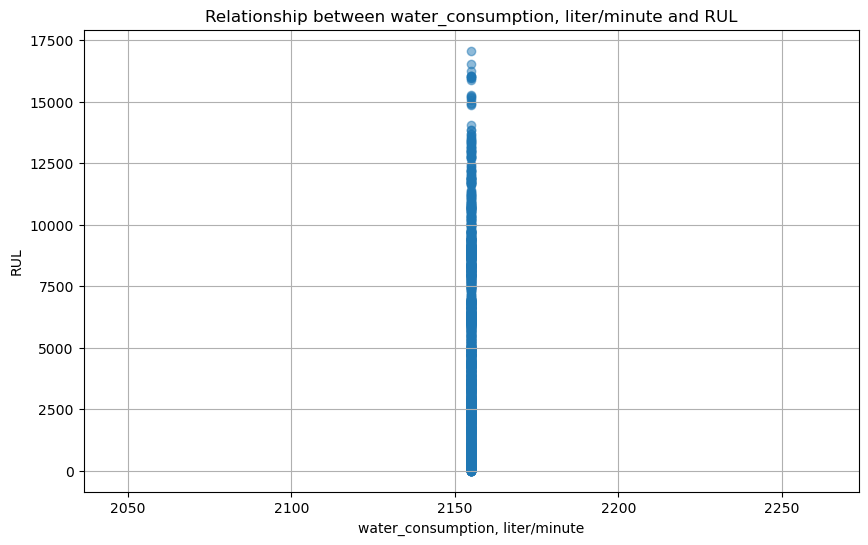

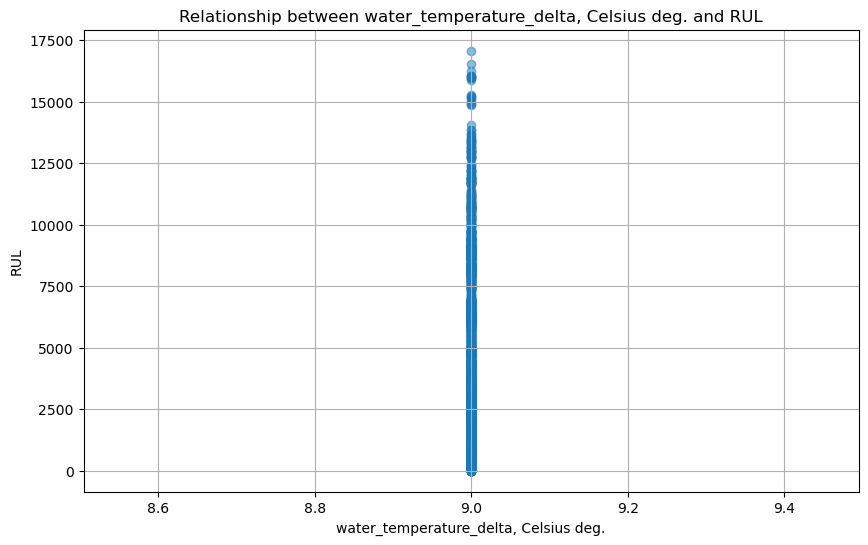

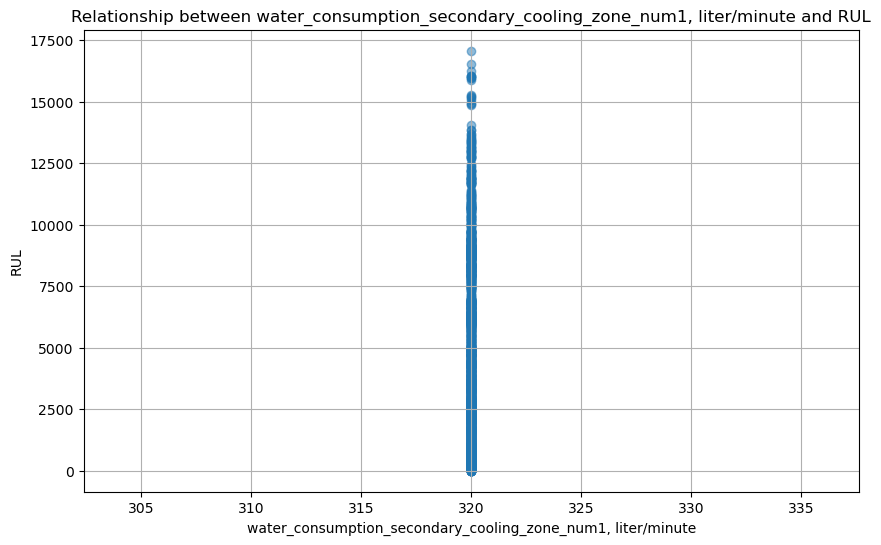

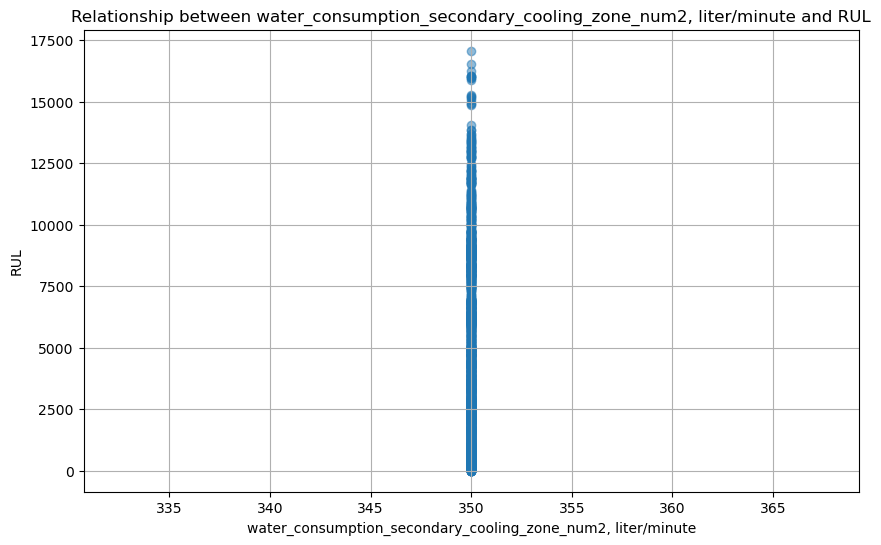

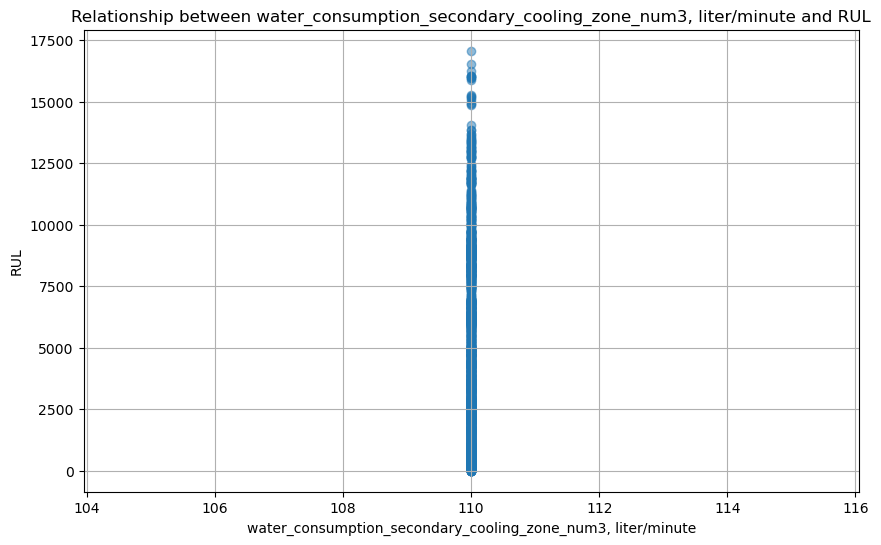

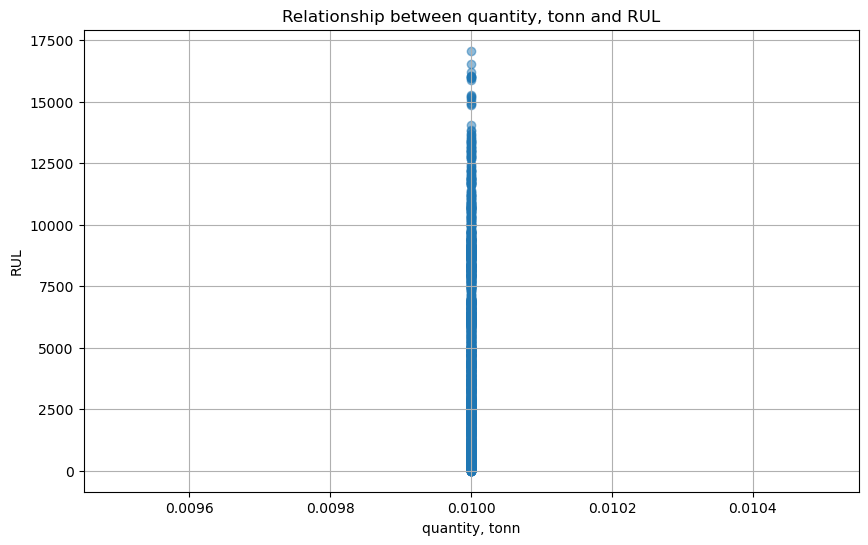

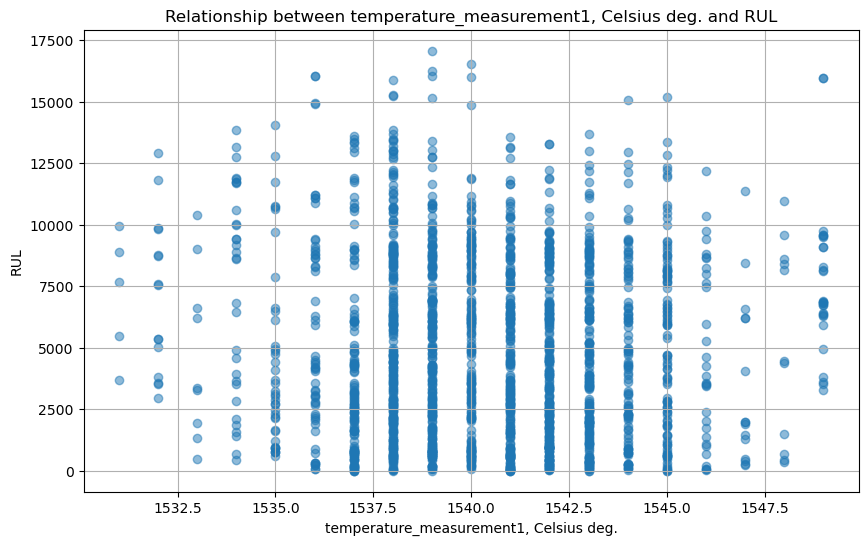

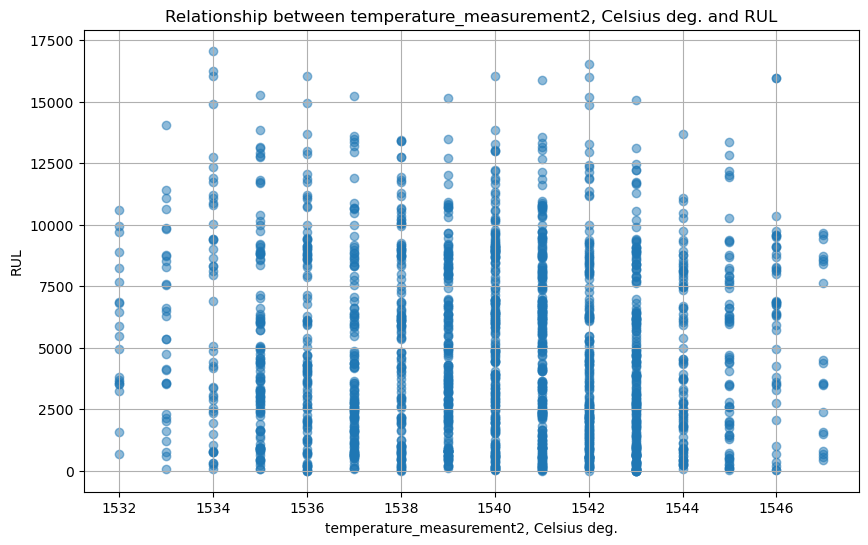

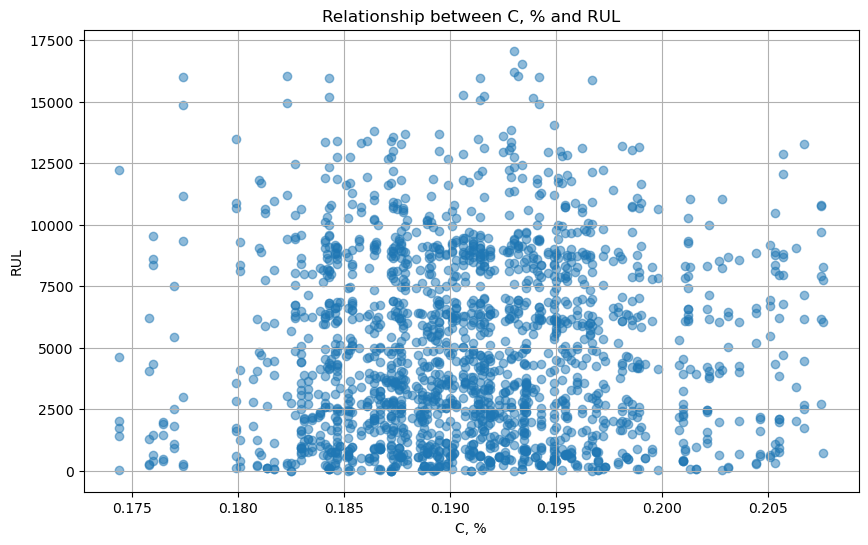

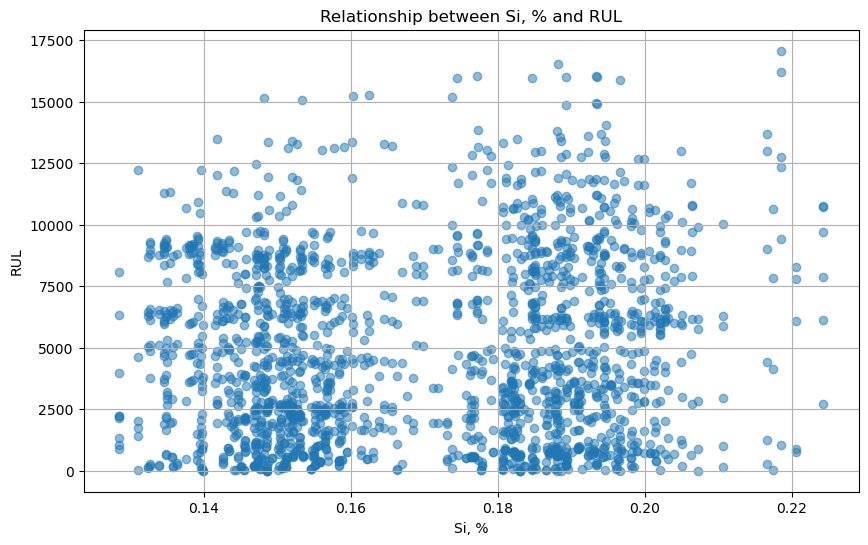

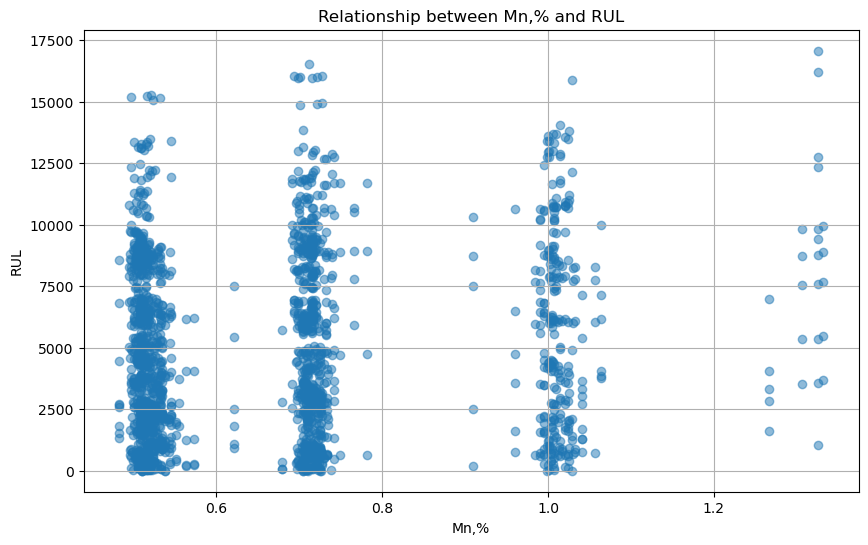

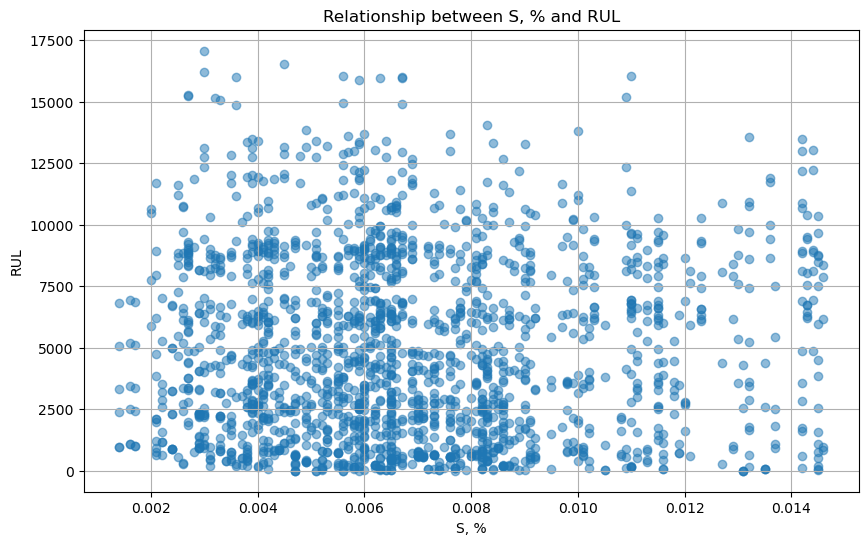

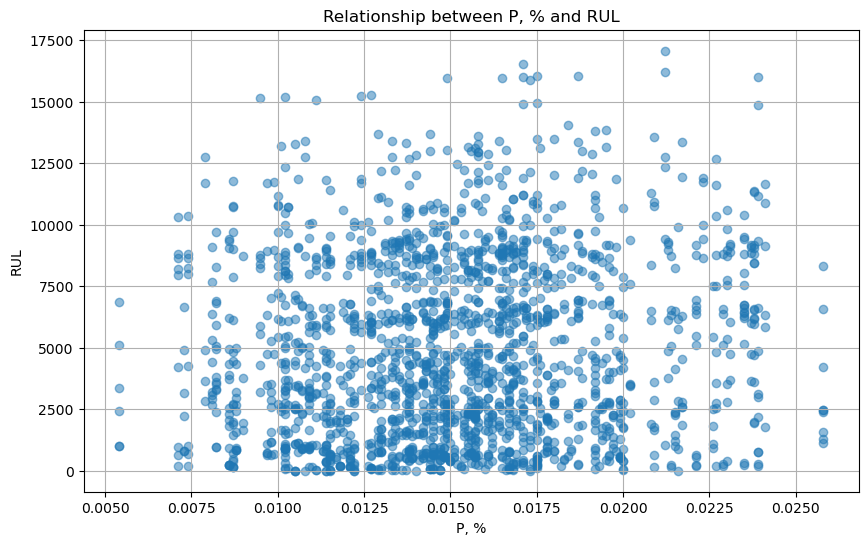

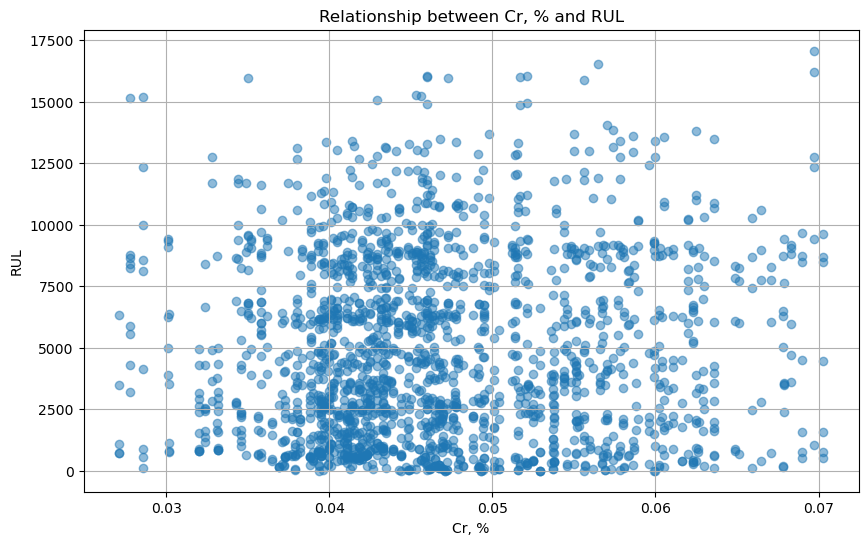

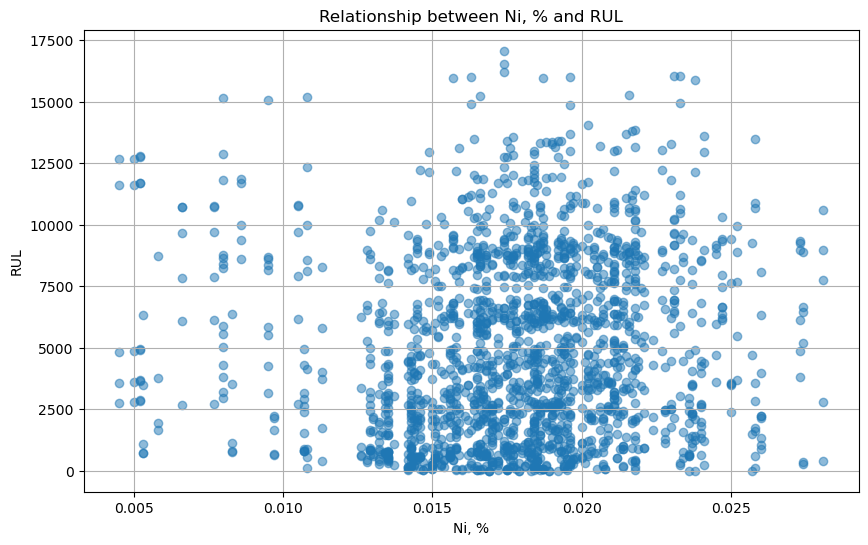

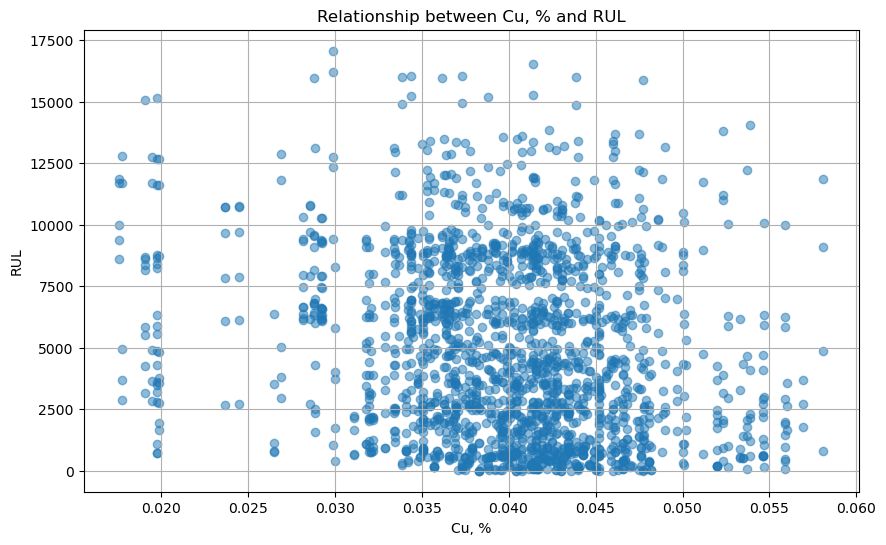

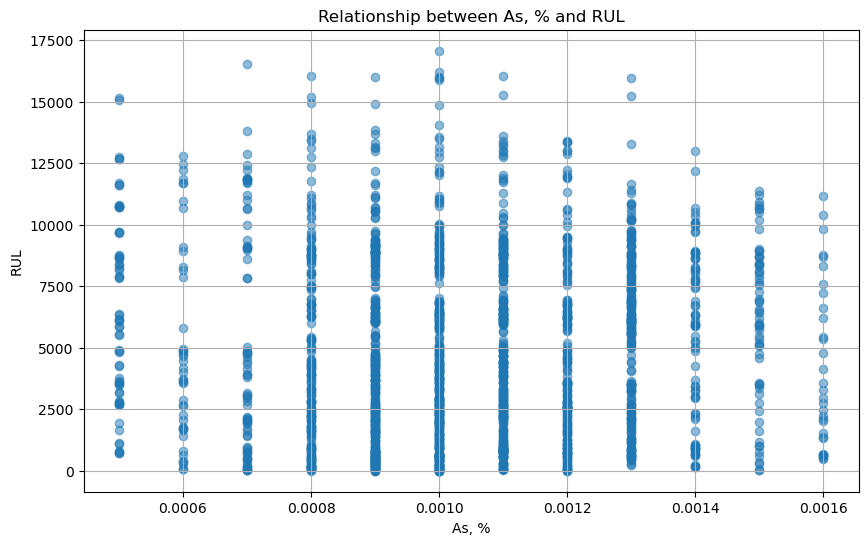

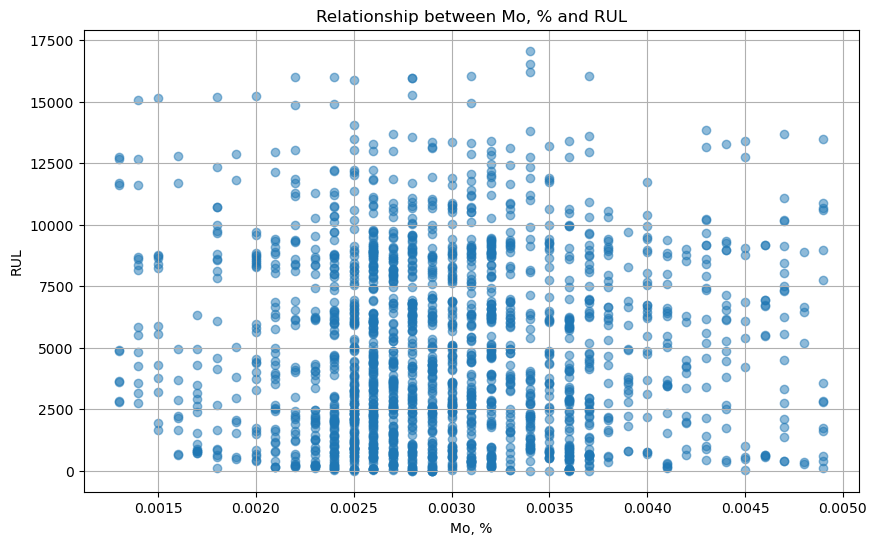

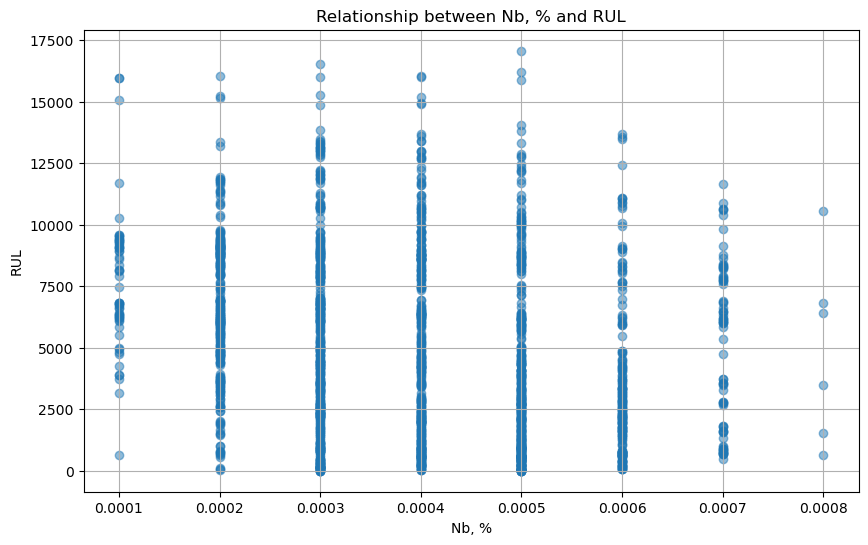

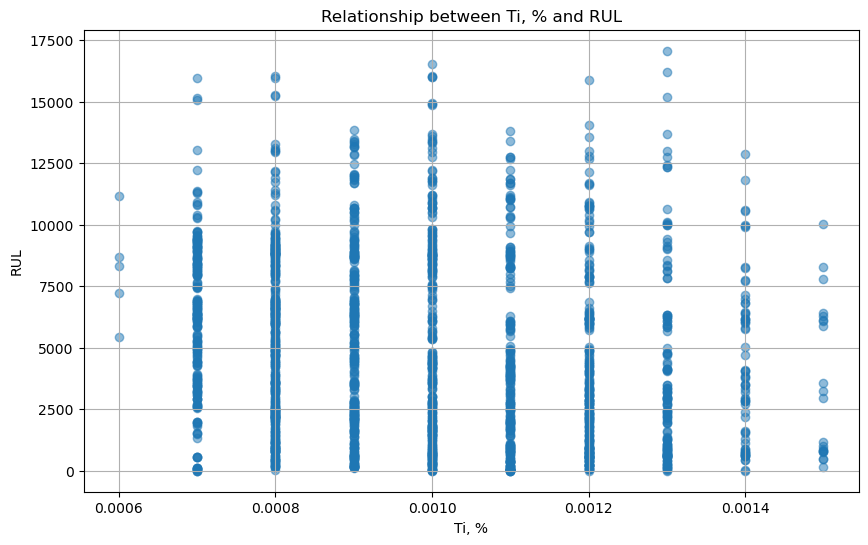

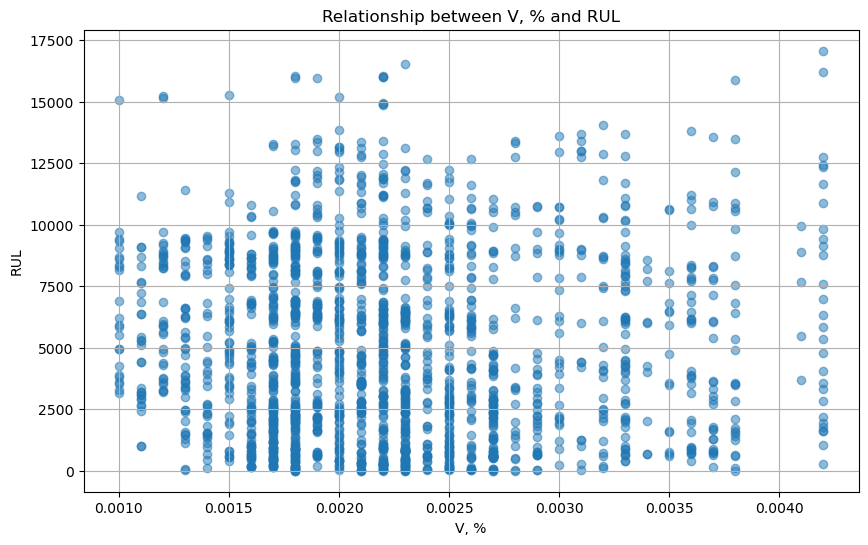

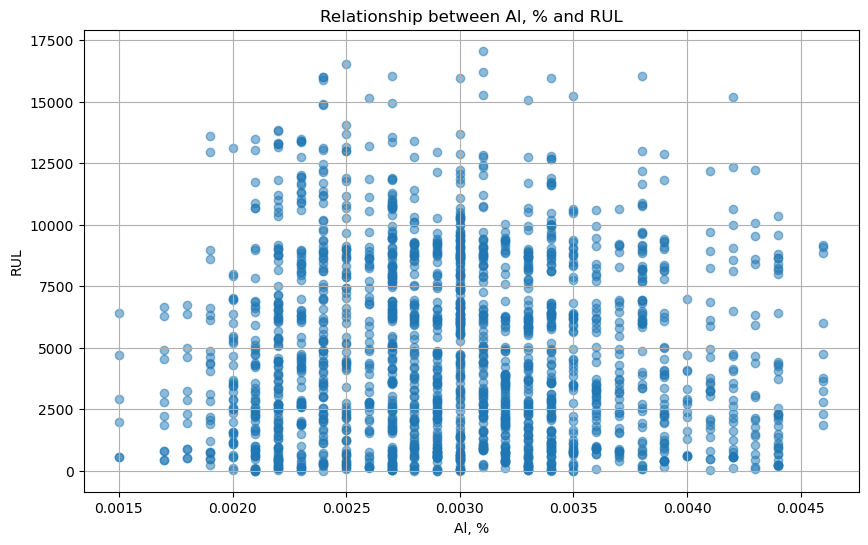

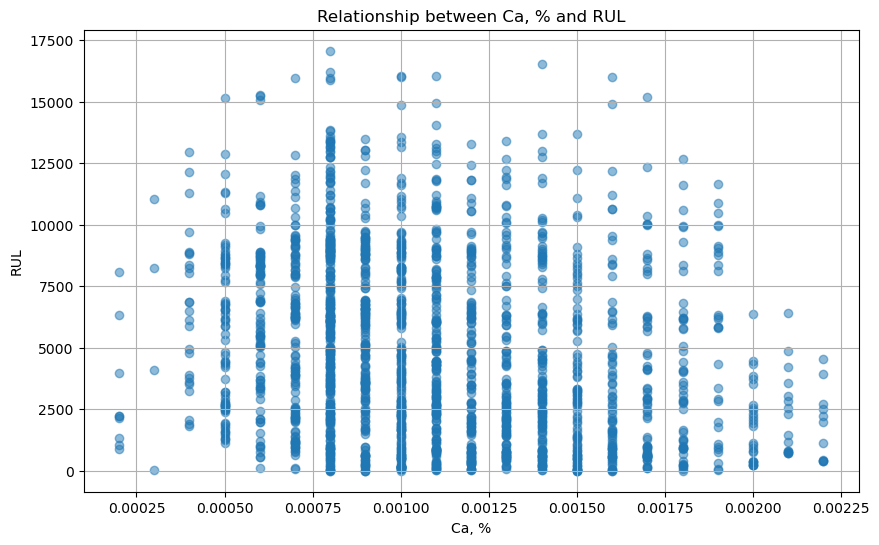

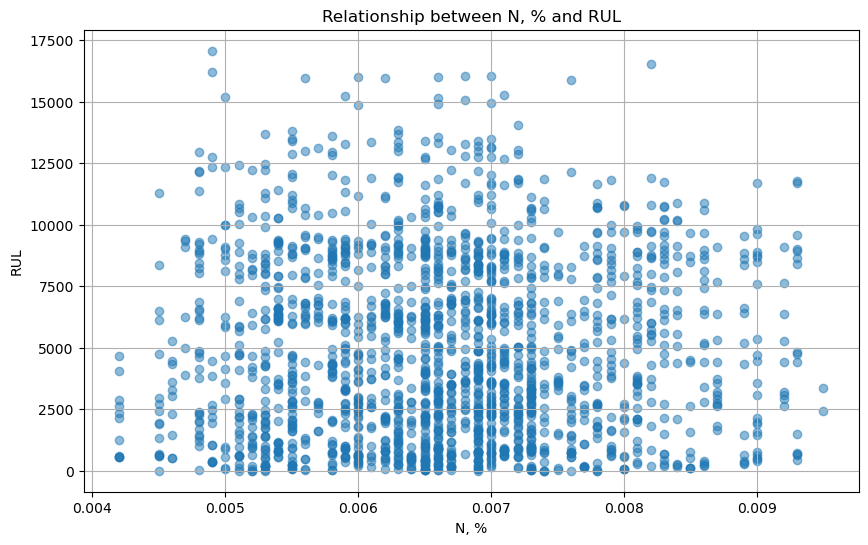

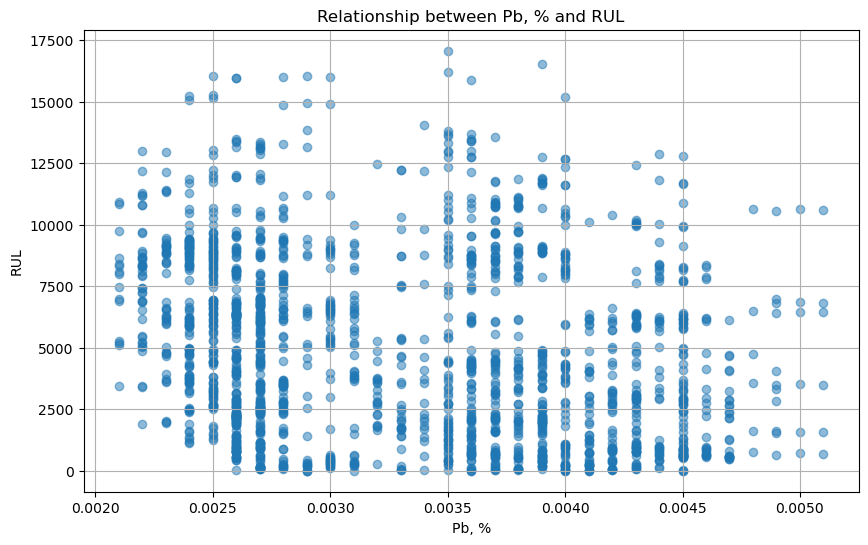

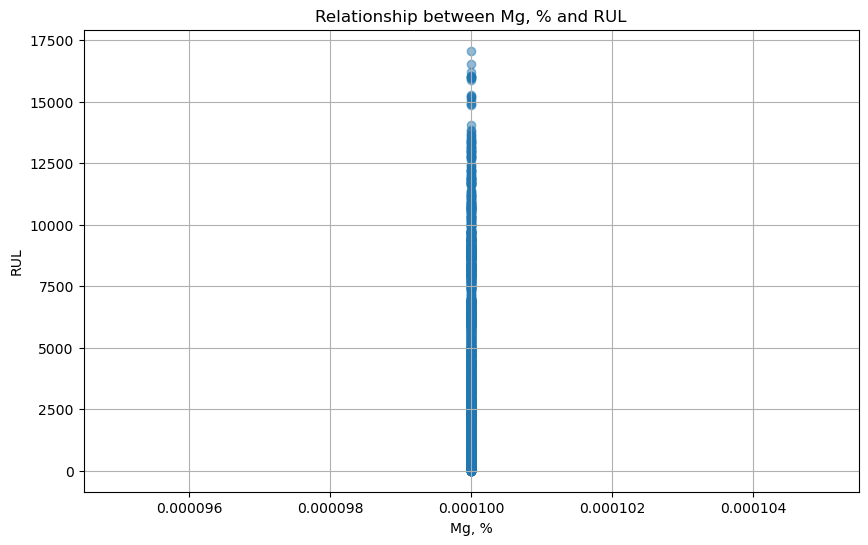

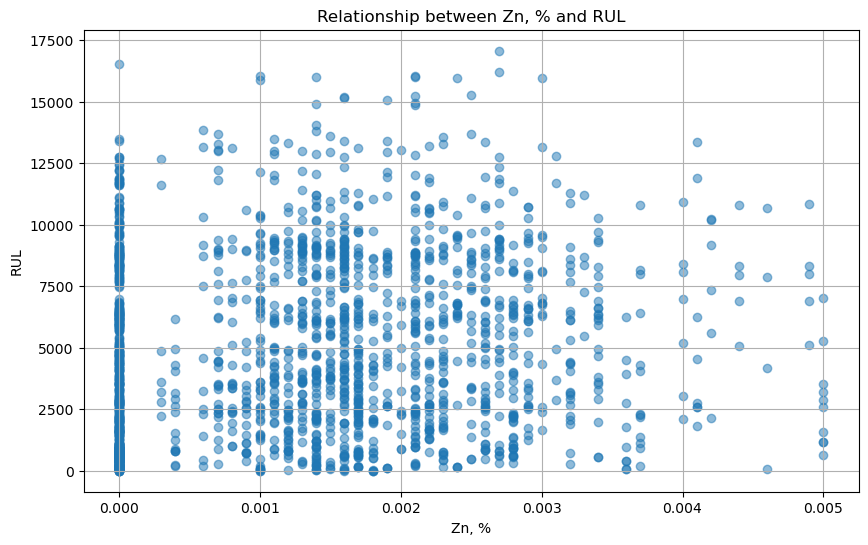

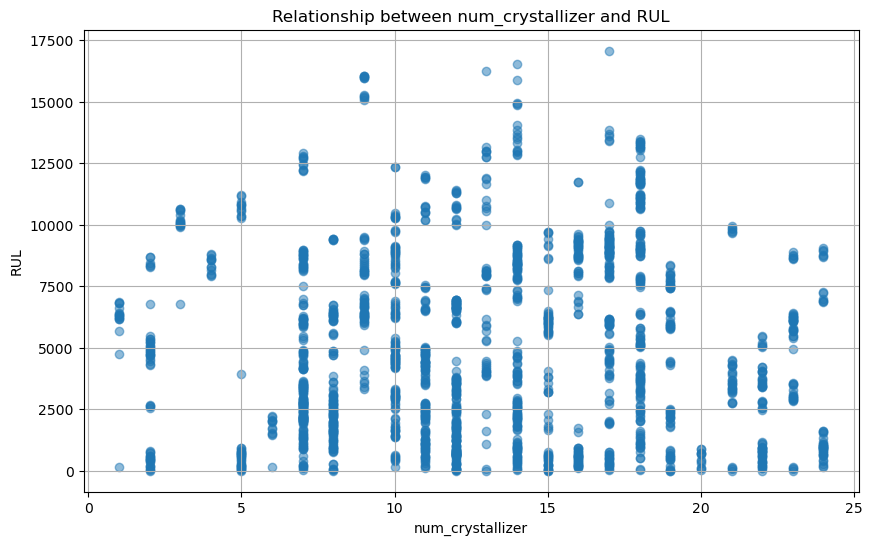

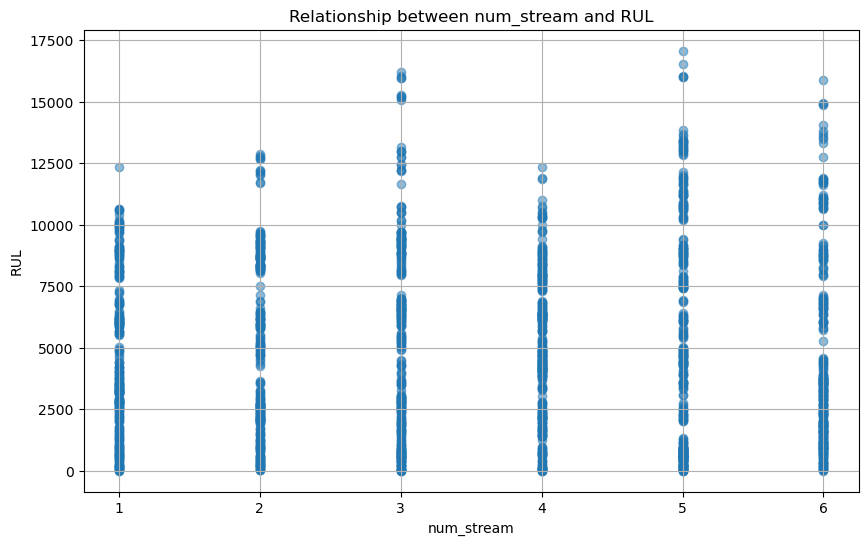

In [14]:
for column in data_encoded.columns:
    if column != 'RUL' and data_encoded[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 6))
        plt.scatter(data_encoded[column], data_encoded['RUL'], alpha=0.5)
        plt.title(f"Relationship between {column} and RUL")
        plt.xlabel(column)
        plt.ylabel("RUL")
        plt.grid(True)
        plt.show()

Na podstawie wykresów, jesteśmy w stanie wywnioskować, że wpływ na żywotność tulei krystalizatora ma opór ('resistance').
Widać również, że tendecja w tym wykresie ma warstwy, co oznaczać może, że istnieją jeszcze inne zmienne, które mają wpływ na RUL.

In [15]:
data['RUL'].describe()

count    1.504900e+04
mean     1.915508e+05
std      1.232179e+06
min      0.000000e+00
25%      2.184000e+03
50%      4.918000e+03
75%      8.232000e+03
max      8.473111e+06
Name: RUL, dtype: float64

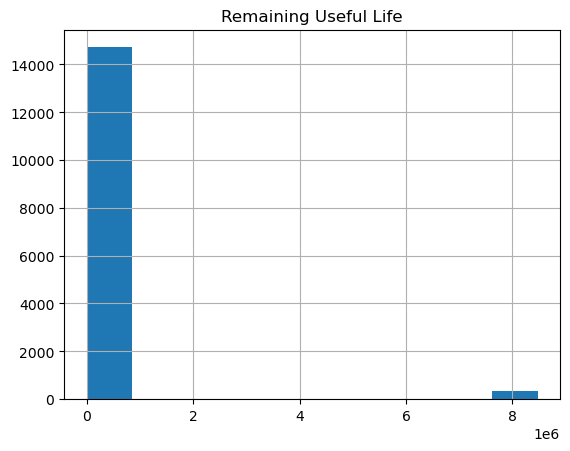

In [16]:
data['RUL'].hist()
plt.title('Remaining Useful Life')
plt.show()

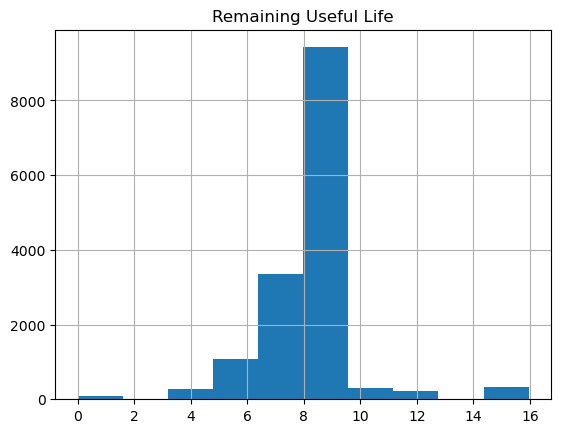

In [17]:
data['RUL'] = np.log1p(data['RUL'])

data['RUL'].hist()
plt.title('Remaining Useful Life')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

def root_mean_squared_error(y_true, y_pred):
    
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Przypisano RUL jako target
X = data_encoded.drop(columns=['RUL'])  
y = data_encoded['RUL']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wybór modelu - drzewo decyzyjne
tree_model = DecisionTreeRegressor(max_depth=30, random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

# Sprawdzanie "dobroci" modelu
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

# R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

# MAPE
mape_result = mape(y_test, y_pred)
print(f"MAPE: {mape_result}%")

# K-krotna walidacja modelu
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
mape_scorer = make_scorer(mape, greater_is_better=False)

# Wyniki kroswalidacji
rmse_scores = cross_val_score(tree_model, X, y, cv=kf, scoring=rmse_scorer)
print(f"Average RMSE (10-fold CV): {np.mean(np.abs(rmse_scores)):.2f}, Standard Deviation RMSE: {np.std(rmse_scores):.2f}")

r2_scores = cross_val_score(tree_model, X, y, cv=kf, scoring='r2')
print(f"Average R^2 (10-fold CV): {np.mean(r2_scores):.2f}, Standard Deviation R^2: {np.std(r2_scores):.2f}")

mape_scores = cross_val_score(tree_model, X, y, cv=kf, scoring=mape_scorer)
print(f"Average MAPE (10-fold CV): {np.mean(np.abs(mape_scores)):.2f}%, Standard Deviation MAPE: {np.std(mape_scores):.2f}%")

RMSE: 514.0831939900467
R^2: 0.9789968631426694
MAPE: 41.779165569163304%
Average RMSE (10-fold CV): 710.94, Standard Deviation RMSE: 132.82
Average R^2 (10-fold CV): 0.96, Standard Deviation R^2: 0.02
Average MAPE (10-fold CV): 28.58%, Standard Deviation MAPE: 17.35%


Wersja z lasem losowym.
Przy wielu parametrach las losowy daje często lepsze rezultaty.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Przypisano RUL jako target
X = data_encoded.drop(columns=['RUL'])  
y = data_encoded['RUL']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametry do przetestowania w GridSearch
param_grid = {
    'n_estimators': [100, 200],            # Liczba drzew
    'max_depth': [10, 20, 30],             # Maksymalna głębokość drzewa
    'min_samples_leaf': [1, 2, 5, 10]      # Minimalna liczba próbek w liściu
}

# Inicjalizacja modelu
forest_model = RandomForestRegressor(random_state=42)

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(forest_model, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)

# Przeprowadzenie wyszukiwania
grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik MAPE:", -grid_search.best_score_)  # Wartość jest negatywna, więc odwracamy znak

# Trenowanie najlepszego modelu
best_forest_model = grid_search.best_estimator_

# Przewidywanie na zbiorze testowym
y_pred = best_forest_model.predict(X_test)

# Sprawdzanie "dobroci" modelu
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

# R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

# MAPE
mape_result = mape(y_test, y_pred)
print(f"MAPE: {mape_result}%")

# K-krotna walidacja modelu
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
mape_scorer = make_scorer(mape, greater_is_better=False)

# Wyniki kroswalidacji dla najlepszego modelu
rmse_scores = cross_val_score(best_forest_model, X, y, cv=kf, scoring=rmse_scorer)
print(f"Average RMSE (10-fold CV): {np.mean(np.abs(rmse_scores)):.2f}, Standard Deviation RMSE: {np.std(rmse_scores):.2f}")

r2_scores = cross_val_score(best_forest_model, X, y, cv=kf, scoring='r2')
print(f"Average R^2 (10-fold CV): {np.mean(r2_scores):.2f}, Standard Deviation R^2: {np.std(r2_scores):.2f}")

mape_scores = cross_val_score(best_forest_model, X, y, cv=kf, scoring=mape_scorer)
print(f"Average MAPE (10-fold CV): {np.mean(np.abs(mape_scores)):.2f}%, Standard Deviation MAPE: {np.std(mape_scores):.2f}%")

Najlepsze parametry: {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 100}
Najlepszy wynik MAPE: 2.1750989043879456e+16
RMSE: 484.9022010887037
R^2: 0.9813135991745535
MAPE: 43.068885953905635%
Average RMSE (10-fold CV): 586.49, Standard Deviation RMSE: 152.87
Average R^2 (10-fold CV): 0.97, Standard Deviation R^2: 0.01
Average MAPE (10-fold CV): 38.27%, Standard Deviation MAPE: 13.97%


Wersja z XGBoost

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

# Funkcja do obliczenia RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Funkcja do obliczenia MAPE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Przypisanie RUL jako target
X = data_encoded.drop(columns=['RUL'])  
y = data_encoded['RUL']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiowanie modelu (możemy zmienić na inny model, np. XGBRegressor)
# forest_model = RandomForestRegressor(random_state=42)
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parametry do przetestowania w GridSearch dla wybranego modelu (tutaj XGBoost)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Inicjalizacja GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)

# Przeprowadzenie wyszukiwania
grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik MAPE:", -grid_search.best_score_)  # Wartość jest negatywna, więc odwracamy znak

# Trenowanie najlepszego modelu
best_model = grid_search.best_estimator_

# Przewidywanie na zbiorze testowym
y_pred = best_model.predict(X_test)

# Sprawdzanie "dobroci" modelu
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

# R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")

# MAPE
mape_result = mape(y_test, y_pred)
print(f"MAPE: {mape_result}%")

# K-krotna walidacja modelu
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
mape_scorer = make_scorer(mape, greater_is_better=False)

# Wyniki kroswalidacji dla najlepszego modelu
rmse_scores = cross_val_score(best_model, X, y, cv=kf, scoring=rmse_scorer)
print(f"Average RMSE (10-fold CV): {np.mean(np.abs(rmse_scores)):.2f}, Standard Deviation RMSE: {np.std(rmse_scores):.2f}")

r2_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
print(f"Average R^2 (10-fold CV): {np.mean(r2_scores):.2f}, Standard Deviation R^2: {np.std(r2_scores):.2f}")

mape_scores = cross_val_score(best_model, X, y, cv=kf, scoring=mape_scorer)
print(f"Average MAPE (10-fold CV): {np.mean(np.abs(mape_scores)):.2f}%, Standard Deviation MAPE: {np.std(mape_scores):.2f}%")


Najlepsze parametry: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Najlepszy wynik MAPE: 1.6962136386756624e+16
RMSE: 400.383214778881
R^2: 0.9872600103868561
MAPE: 27.002924335078838%
Average RMSE (10-fold CV): 464.36, Standard Deviation RMSE: 108.70
Average R^2 (10-fold CV): 0.98, Standard Deviation R^2: 0.01
Average MAPE (10-fold CV): 22.40%, Standard Deviation MAPE: 8.22%


Jak dotąd XGBoost daje najlepsze rezultaty. Planowane jest również przetestowanie sieci neuronowych.